# Problem:

## For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display 

# ANALYSIS ON SPARKLING DATA

#  Read the data as an appropriate Time Series data and plot the data.

In [2]:
# Read the data Sparkling.csv
df = pd.read_csv('Sparkling.csv')

In [3]:
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [4]:
df.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [5]:
df.shape

(187, 2)

In [6]:
Date = pd.date_range(start='01-01-1980',end='08-01-1995', freq='M')
Date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [7]:
df['Date'] = Date

In [8]:
df.head()

YearMonth  Sparkling       Date
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   YearMonth  187 non-null    object        
 1   Sparkling  187 non-null    int64         
 2   Date       187 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.5+ KB


In [10]:
df.drop('YearMonth', axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Sparkling  187 non-null    int64         
 1   Date       187 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


In [12]:
df.set_index('Date', inplace=True)

In [13]:
df.head()

Sparkling
Date                 
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [14]:
df.shape

(187, 1)

In [15]:
df.index

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', name='Date', length=187, freq=None)

In [16]:
df.index.freq = 'M'
df.index

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', name='Date', length=187, freq='M')

# Plot the Time Series

In [17]:
# set the width and height as 12,8 of the figures for the rest of the notebook using rcParams
plt.rcParams['figure.figsize'] = 12,8

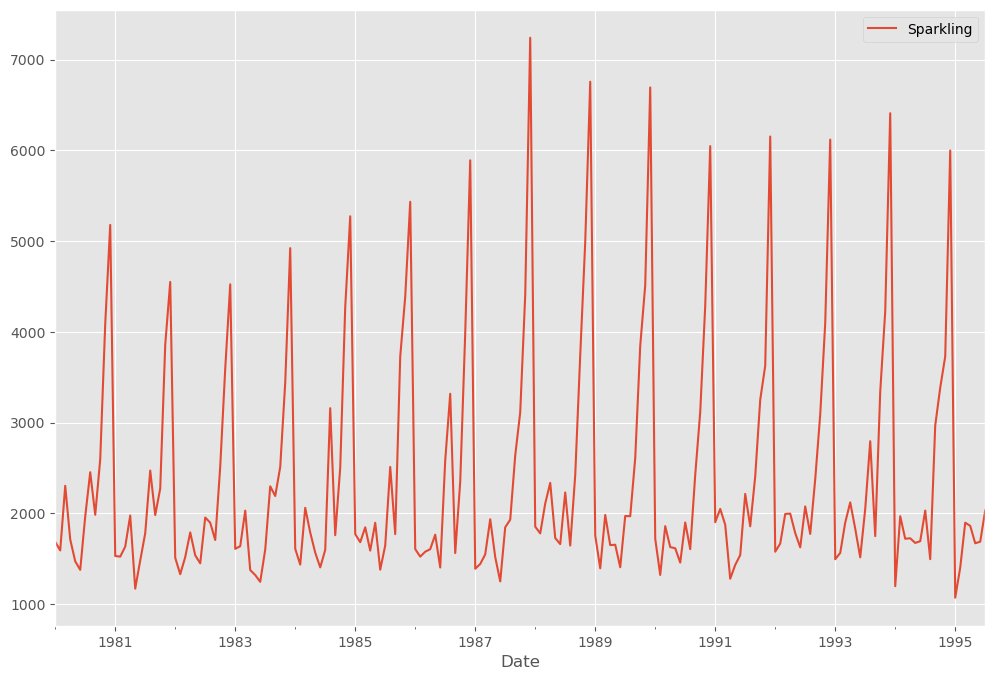

In [18]:
# line plot of the data
df.plot();

#  Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [19]:
df.describe(include='all').T

count         mean         std     min     25%     50%     75%  \
Sparkling  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0  2549.0   

              max  
Sparkling  7242.0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Freq: M
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [21]:
df.isnull().sum()

Sparkling    0
dtype: int64

## Mean and Median of sparkling wine sale in 20th century

In [22]:
# mean of the time series
df.mean()

Sparkling    2402.417112
dtype: float64

In [23]:
# median of the time series
df.median()

Sparkling    1874.0
dtype: float64

## Monthly Observations for year 1980

In [24]:
df.loc['1980']

Sparkling
Date                 
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471
1980-06-30       1377
1980-07-31       1966
1980-08-31       2453
1980-09-30       1984
1980-10-31       2596
1980-11-30       4087
1980-12-31       5179

## Boxplot 

In [25]:
df. columns

Index(['Sparkling'], dtype='object')

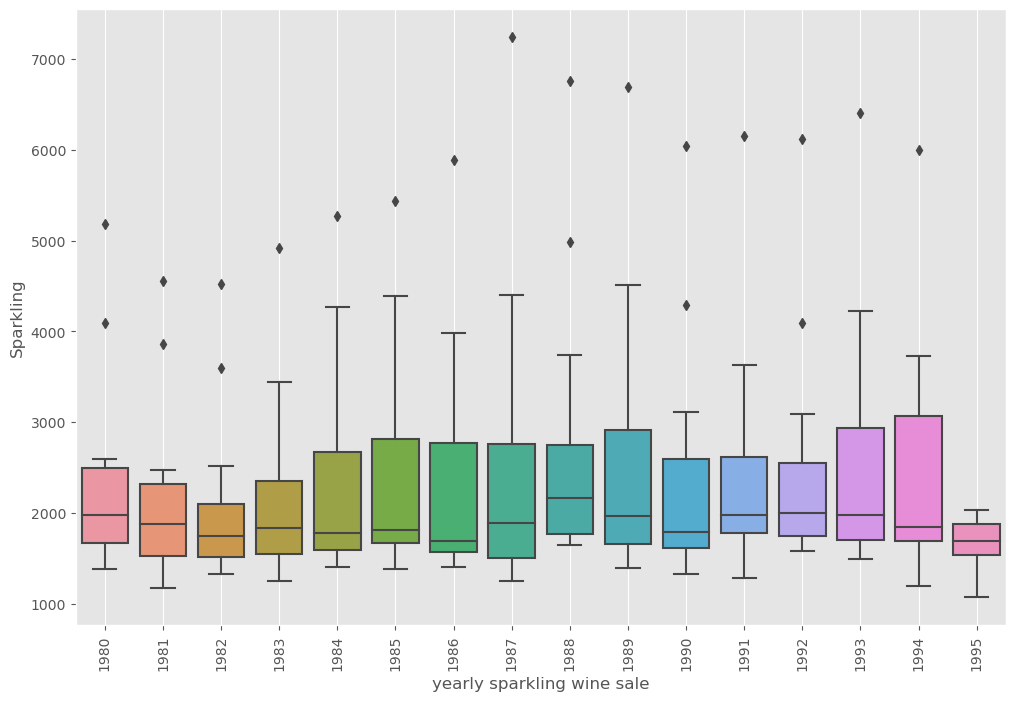

In [26]:
# boxplot of data for each year with year labels at 90 degree angle
sns.boxplot(data=df, x=df.index.year, y='Sparkling');
plt.xlabel('yearly sparkling wine sale');
plt.xticks(rotation=90);
plt.grid();

## Boxplot for each Calendar month across years

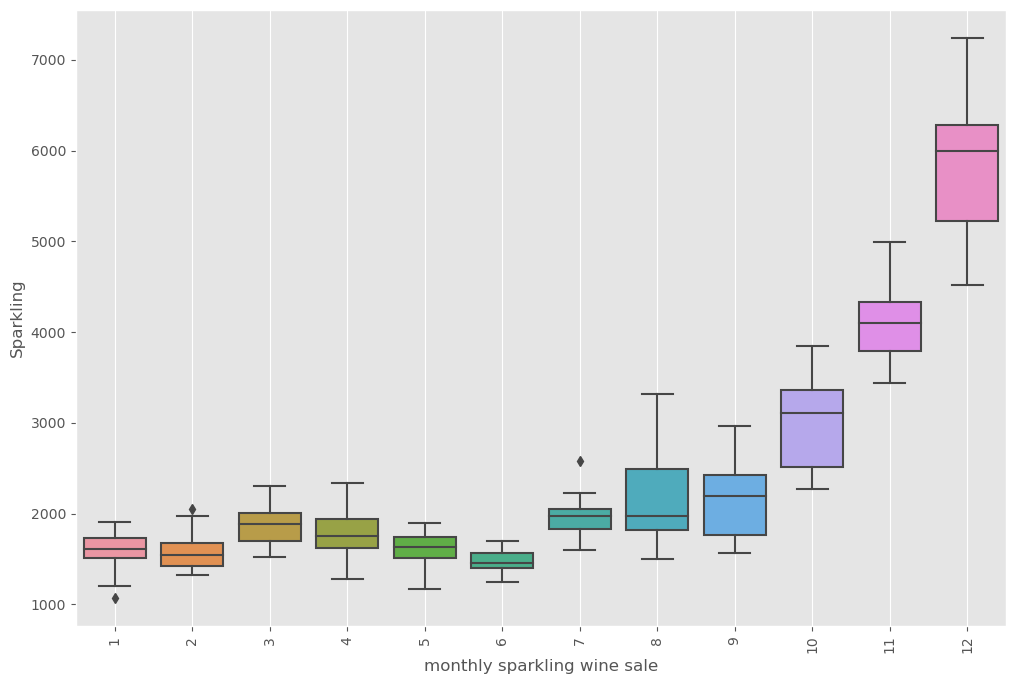

In [27]:
# boxplot for each month
sns.boxplot(data=df, x=df.index.month, y='Sparkling');
plt.xlabel('monthly sparkling wine sale');
plt.xticks(rotation=90);
plt.grid();

## monthplot of the Time Series

In [28]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

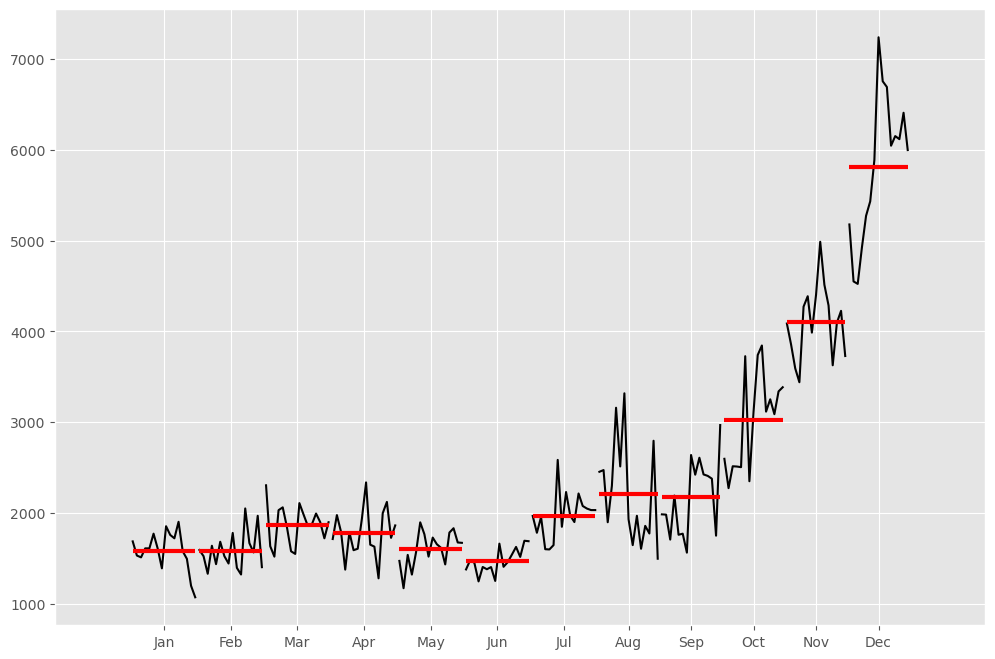

In [29]:
# month plot for the time series data
month_plot(df['Sparkling']);

In [30]:
month_sales_years = pd.pivot_table(df,values='Sparkling', columns=df.index.month_name(), index=df.index.year)
month_sales_years

Date   April  August  December  February  January    July    June   March  \
Date                                                                        
1980  1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0  2304.0   
1981  1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0  1633.0   
1982  1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0  1518.0   
1983  1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0  2030.0   
1984  1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0  2061.0   
1985  1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0  1846.0   
1986  1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0  1577.0   
1987  1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0  1548.0   
1988  2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0  2108.0   
1989  1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0  1982.0   
1990  1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0  1859.0   
1991  1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0  1874.0   
1992  1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0  1993.0   
1993  2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0  1898.0   
1994  1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0  1720.0   
1995  1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0  1897.0   

Date     May  November  October  September  
Date                                        
1980  1471.0    4087.0   2596.0     1984.0  
1981  1170.0    3857.0   2273.0     1981.0  
1982  1537.0    3593.0   2514.0     1706.0  
1983  1320.0    3440.0   2511.0     2191.0  
1984  1567.0    4273.0   2504.0     1759.0  
1985  1896.0    4388.0   3727.0     1771.0  
1986  1765.0    3987.0   2349.0     1562.0  
1987  1518.0    4405.0   3114.0     2638.0  
1988  1728.0    4988.0   3740.0     2421.0  
1989  1654.0    4514.0   3845.0     2608.0  
1990  1615.0    4286.0   3116.0     2424.0  
1991  1432.0    3627.0   3252.0     2408.0  
1992  1783.0    4096.0   3088.0     2377.0  
1993  1831.0    4227.0   3339.0     1749.0  
1994  1674.0    3729.0   3385.0     2968.0  
1995  1670.0       NaN      NaN        NaN

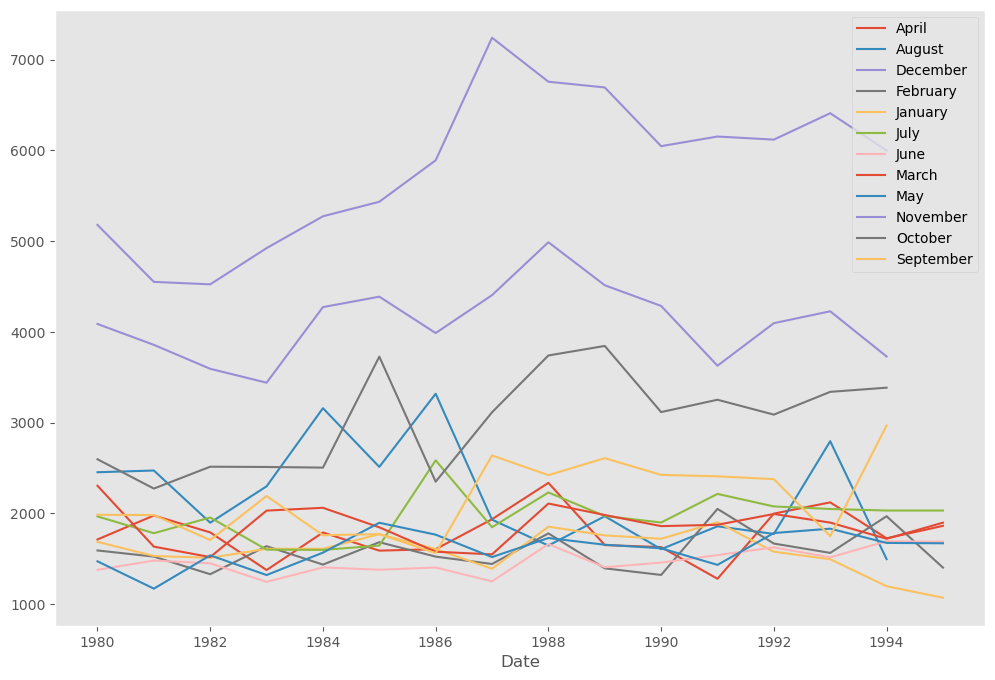

In [31]:
month_sales_years.plot()
plt.grid()
plt.legend(loc='best');

## Conversion of Data to other periodicity (Resampling)

In [32]:
df_year = df.resample('A').sum()
df_year.head()

Sparkling
Date                 
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

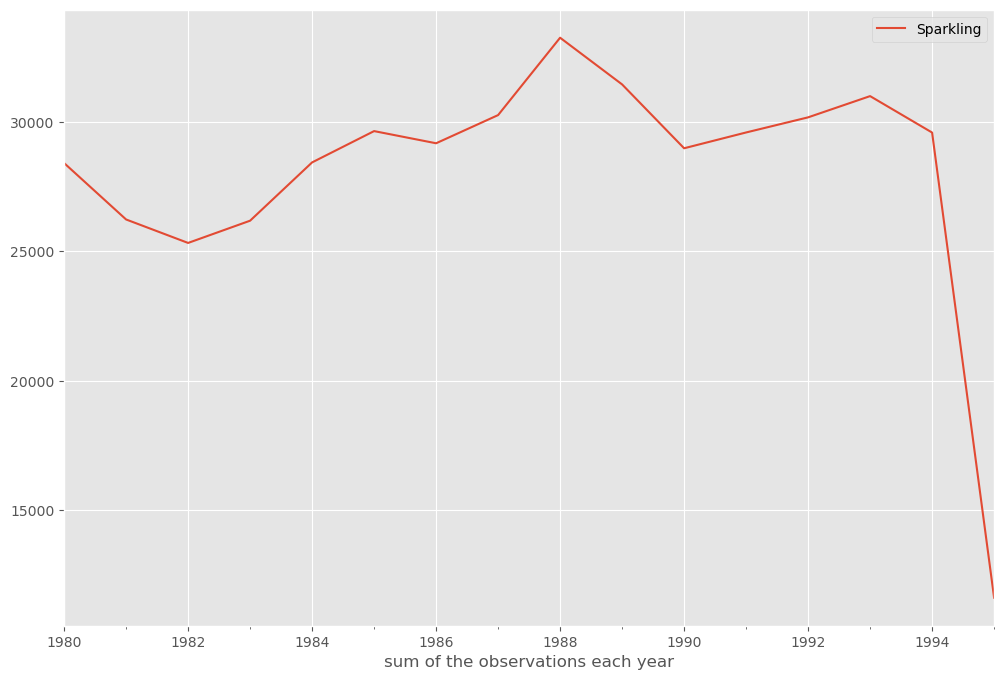

In [33]:
df_year.plot();
plt.xlabel('sum of the observations each year');

In [34]:
df_yearly_mean = df.resample('Y').mean()
df_yearly_mean.head()

Sparkling
Date                   
1980-12-31  2367.166667
1981-12-31  2185.583333
1982-12-31  2110.083333
1983-12-31  2181.666667
1984-12-31  2369.250000

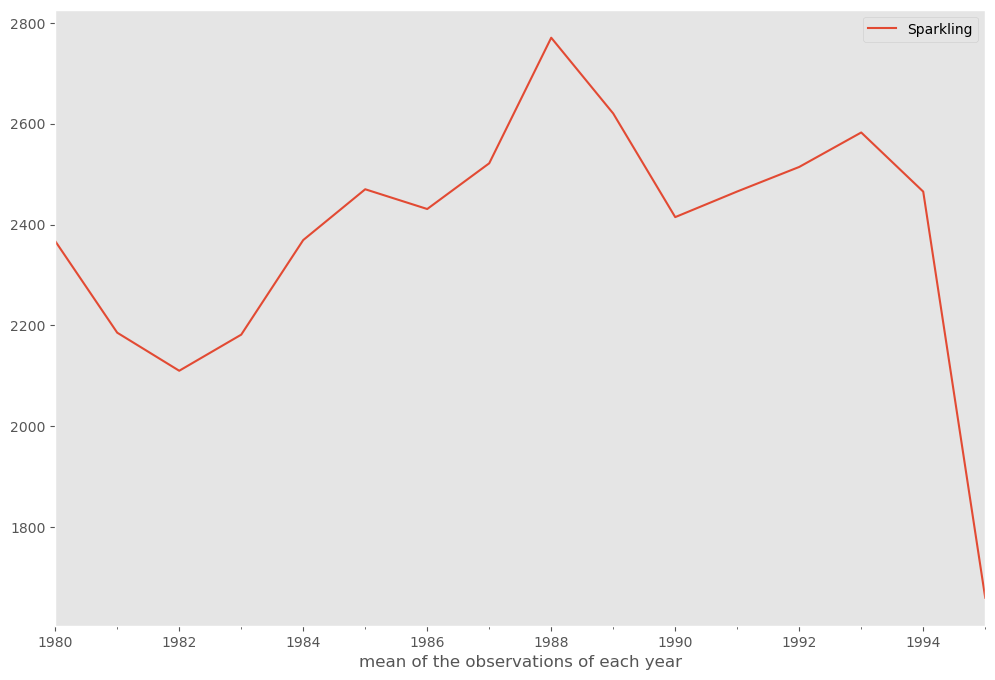

In [35]:
df_yearly_mean.plot()
plt.grid()
plt.xlabel('mean of the observations of each year');

In [36]:
# resample the data to quarterly frequency and calculate the sum for each quarter
quarterly_sale = df.resample(rule='Q').sum()
quarterly_sale.head()

Sparkling
Date                 
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686

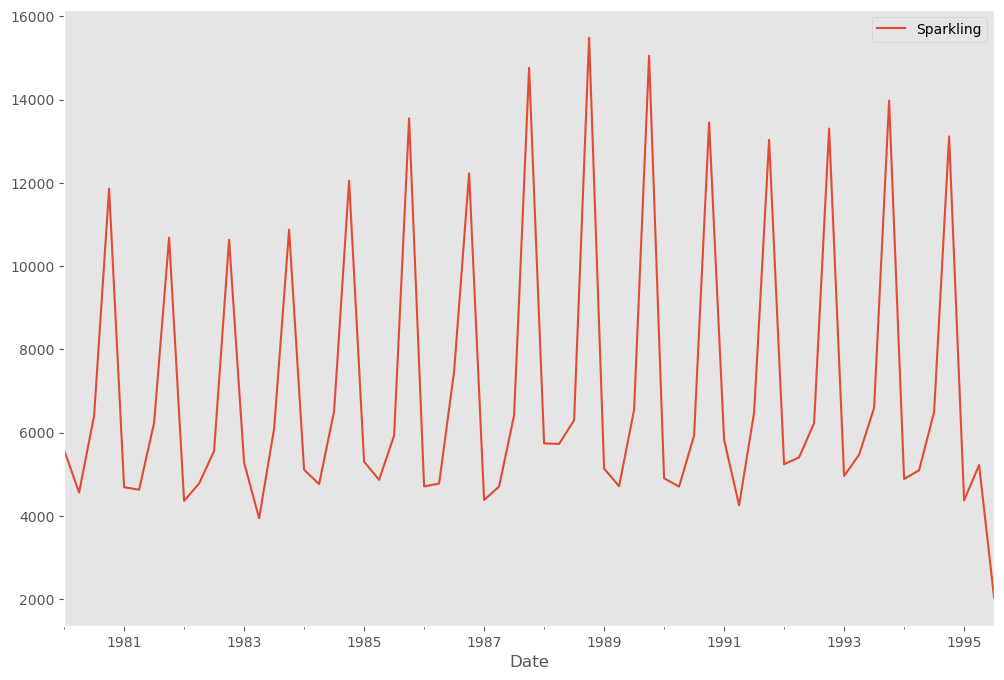

In [37]:
# plot the quarterly data as a quarter plot
quarterly_sale.plot();
plt.grid()

In [38]:
quarterly_sale_mean = df.resample(rule='Q').mean()
quarterly_sale_mean.head()

Sparkling
Date                   
1980-03-31  1860.333333
1980-06-30  1520.000000
1980-09-30  2134.333333
1980-12-31  3954.000000
1981-03-31  1562.000000

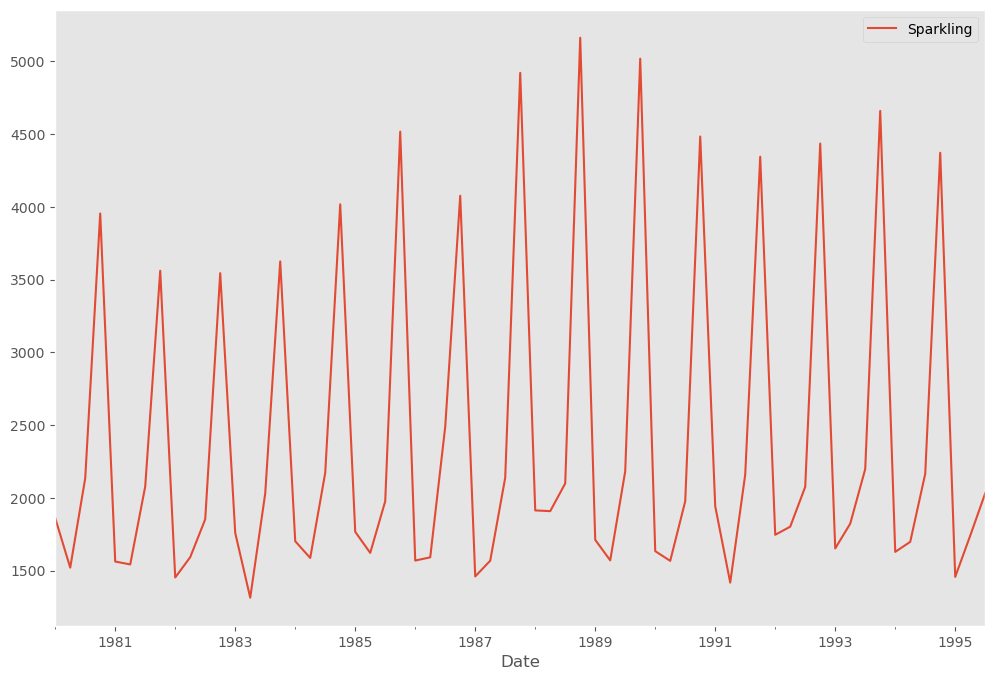

In [39]:
quarterly_sale_mean.plot();
plt.grid()

In [40]:
df_daily_sale = df.resample('D').sum()
df_daily_sale

Sparkling
Date                 
1980-01-31       1686
1980-02-01          0
1980-02-02          0
1980-02-03          0
1980-02-04          0
...               ...
1995-07-27          0
1995-07-28          0
1995-07-29          0
1995-07-30          0
1995-07-31       2031

[5661 rows x 1 columns]

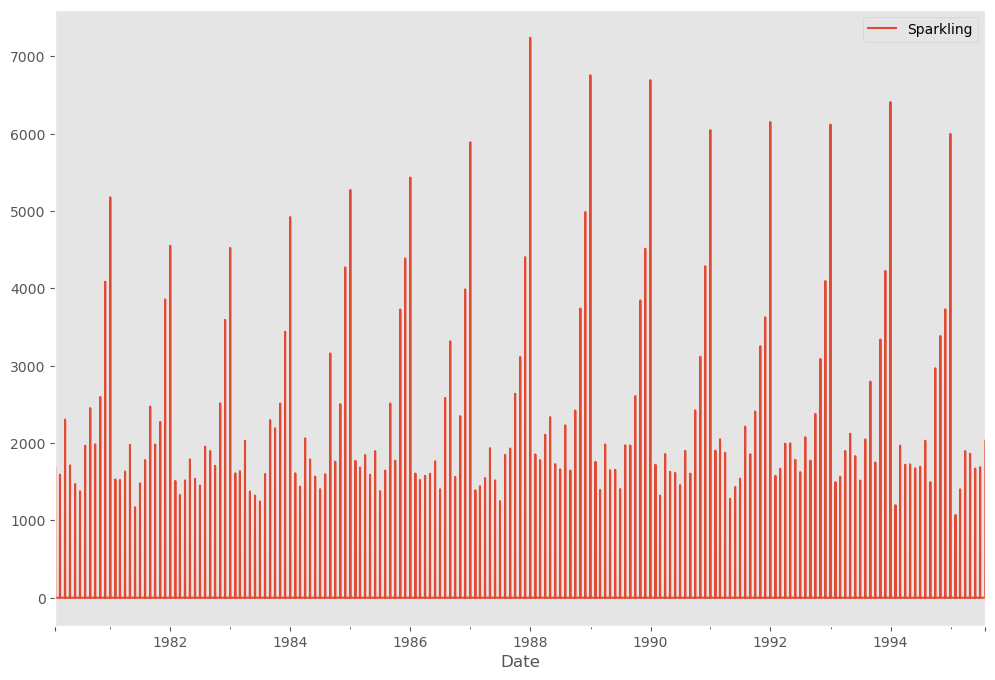

In [41]:
df_daily_sale.plot()
plt.grid()

In [42]:
df_decade_sale = df.resample('10y').sum()
df_decade_sale.head()

Sparkling
Date                 
1980-12-31      28406
1990-12-31     288893
2000-12-31     131953

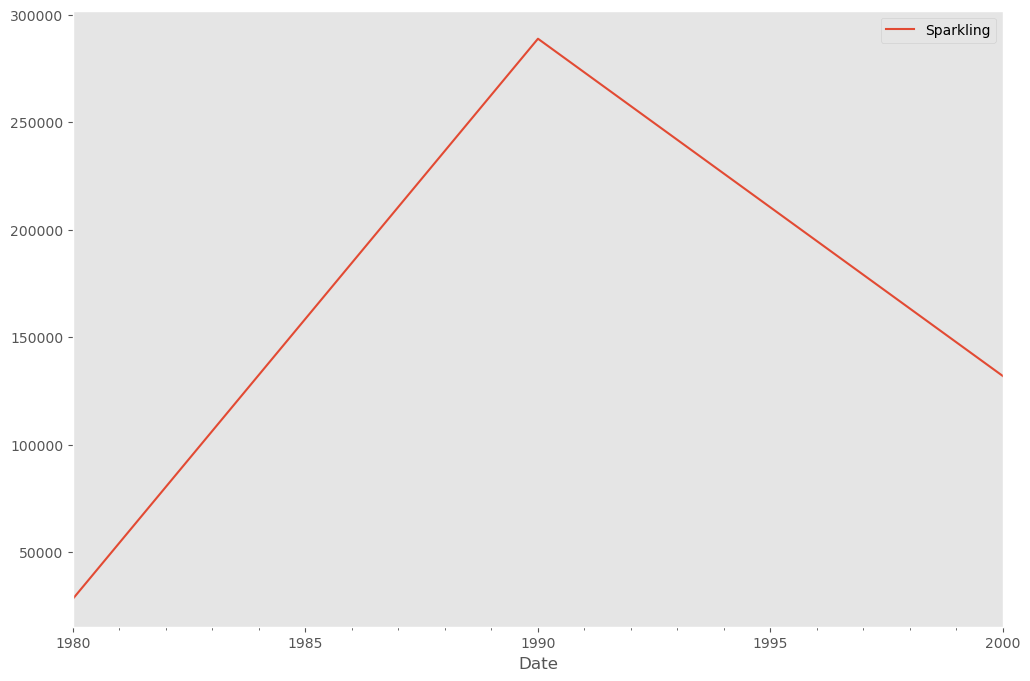

In [43]:
df_decade_sale.plot()
plt.grid()

## Time Series Decomposition

# Additive Model

In [44]:
df.head()

Sparkling
Date                 
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

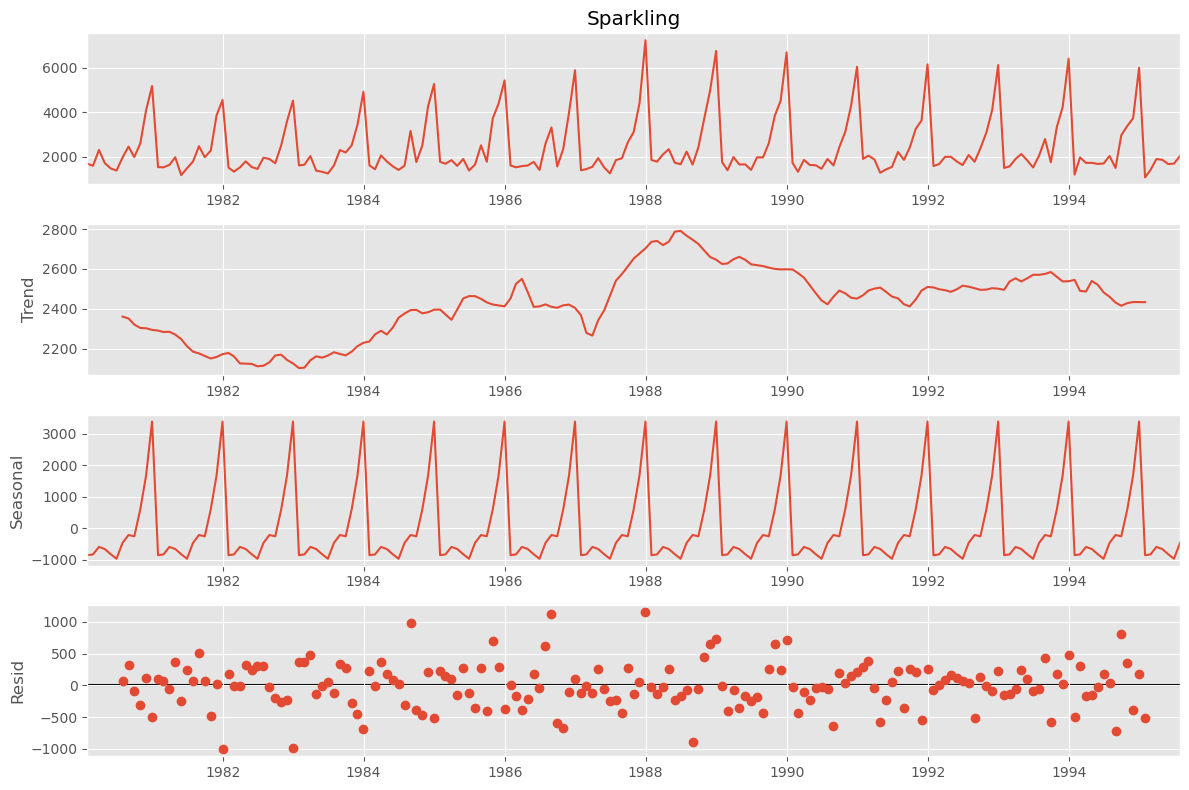

In [45]:
# decompose time series components using additive model & plot the components
from statsmodels.tsa.seasonal import seasonal_decompose
seas_decom = seasonal_decompose(df['Sparkling'], model='additive')
seas_decom.plot();

In [46]:
# extract the trend component and print the first 12 rows
seas_decom.trend.head(12)

Date
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Freq: M, Name: trend, dtype: float64

In [47]:
# last 12 rows of the trend component
seas_decom.trend.tail(12)

Date
1994-08-31    2431.166667
1994-09-30    2414.958333
1994-10-31    2428.041667
1994-11-30    2433.583333
1994-12-31    2433.208333
1995-01-31    2433.000000
1995-02-28            NaN
1995-03-31            NaN
1995-04-30            NaN
1995-05-31            NaN
1995-06-30            NaN
1995-07-31            NaN
Freq: M, Name: trend, dtype: float64

In [48]:
# extract the seasonal component and print the first 12 rows
seas_decom.seasonal.head(12)

Date
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Freq: M, Name: seasonal, dtype: float64

In [49]:
# output the min and max seasonal component values
seas_decom.seasonal.min(), seas_decom.seasonal.max()

(-967.4340112433861, 3386.98384589947)

In [50]:
# extract the seasonal component and print the last 12 rows
seas_decom.seasonal.tail(12)

Date
1994-08-31    -214.332821
1994-09-30    -254.677265
1994-10-31     599.769957
1994-11-30    1675.067179
1994-12-31    3386.983846
1995-01-31    -854.260599
1995-02-28    -830.350678
1995-03-31    -592.356630
1995-04-30    -658.490559
1995-05-31    -824.416154
1995-06-30    -967.434011
1995-07-31    -465.502265
Freq: M, Name: seasonal, dtype: float64

In [51]:
seas_decom.resid.head(12)

Date
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.353290
1980-11-30    109.891154
1980-12-31   -501.775513
Freq: M, Name: resid, dtype: float64

In [52]:
seas_decom.resid.tail(12)

Date
1994-08-31   -721.833846
1994-09-30    807.718932
1994-10-31    357.188376
1994-11-30   -379.650513
1994-12-31    178.807821
1995-01-31   -508.739401
1995-02-28           NaN
1995-03-31           NaN
1995-04-30           NaN
1995-05-31           NaN
1995-06-30           NaN
1995-07-31           NaN
Freq: M, Name: resid, dtype: float64

In [53]:
# check the mean of the residual component. It should be close to zero for additive model
seas_decom.resid.mean()

-1.2088458994707487

In [54]:
-465.502265+70.835599+2360.666667

1966.0000009999999

In [55]:
df.head(10)

Sparkling
Date                 
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471
1980-06-30       1377
1980-07-31       1966
1980-08-31       2453
1980-09-30       1984
1980-10-31       2596

## De-Seasonalized Time Series

In [56]:
# time series values minus the seasonal component
de_TS = df['Sparkling'] - seas_decom.seasonal
de_TS.head(12)

Date
1980-01-31    2540.260599
1980-02-29    2421.350678
1980-03-31    2896.356630
1980-04-30    2370.490559
1980-05-31    2295.416154
1980-06-30    2344.434011
1980-07-31    2431.502265
1980-08-31    2667.332821
1980-09-30    2238.677265
1980-10-31    1996.230043
1980-11-30    2411.932821
1980-12-31    1792.016154
Freq: M, dtype: float64

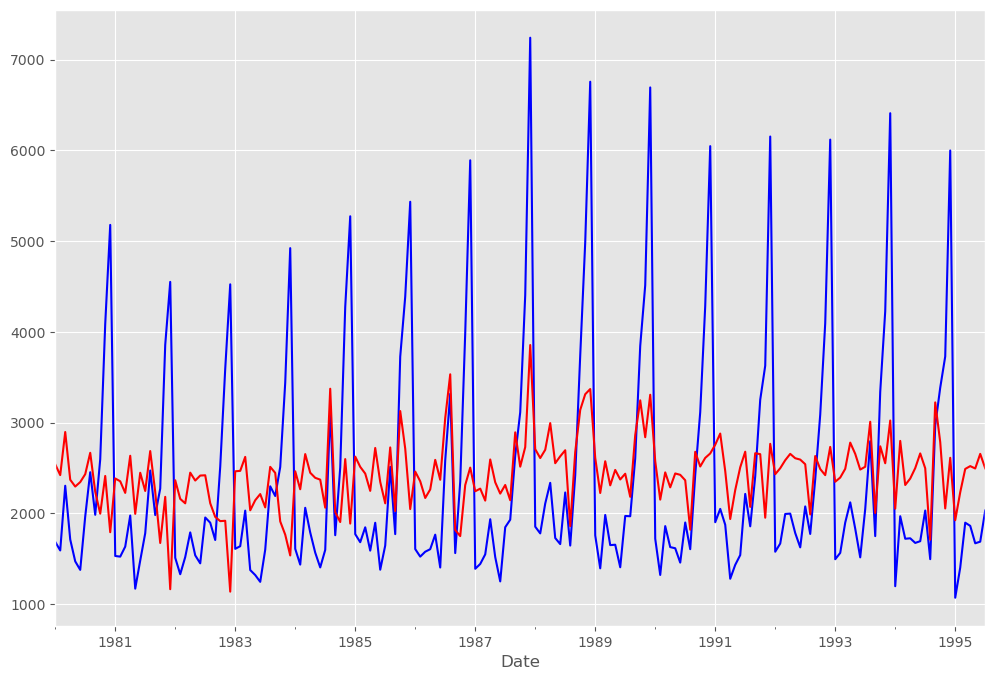

In [57]:
# plot the actual time series and the deseasonalized time series in different colors in the same plot
df['Sparkling'].plot(label = 'Actual', color='blue')
de_TS.plot(label = 'Deseasonalized', color='red');

## Multiplicative Model

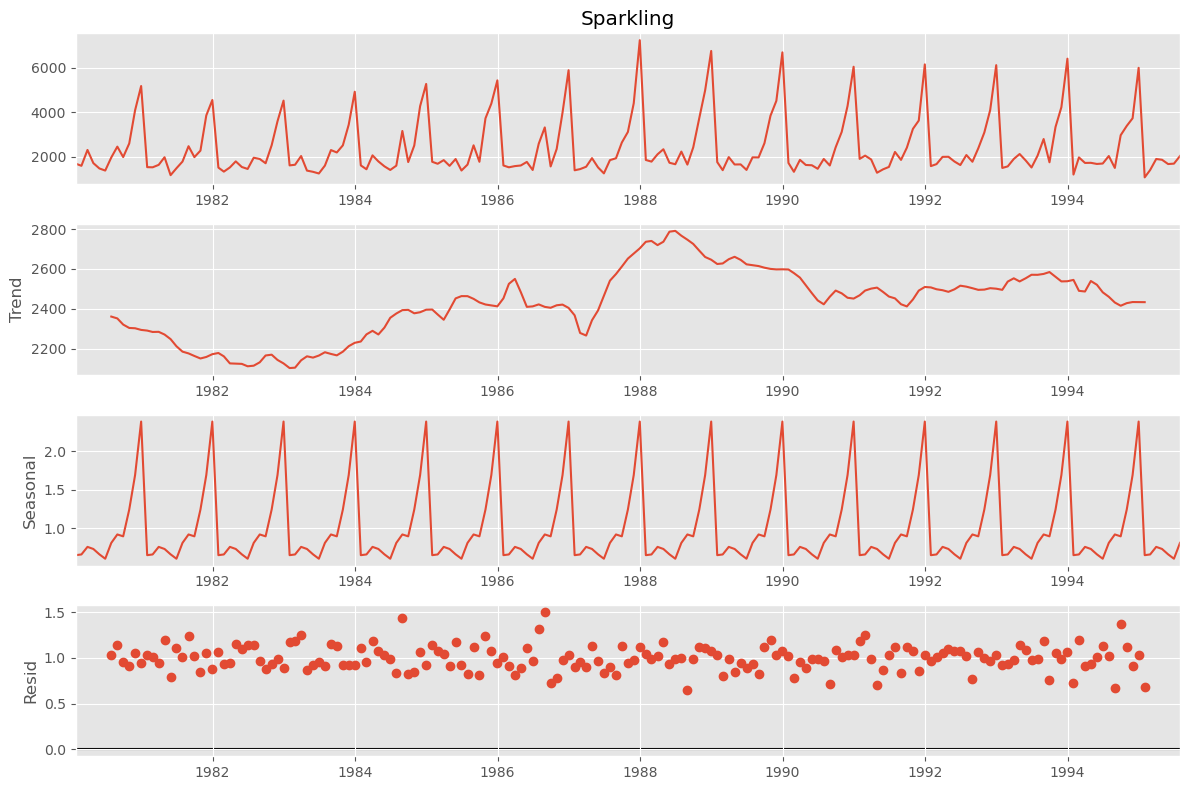

In [58]:
# decompose time series using multiplicative model
decom_mult = seasonal_decompose(df['Sparkling'], model='multiplicative')
decom_mult.plot();

In [59]:
# extract the trend component and print the first 12 rows
decom_mult.trend.head(12)

Date
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Freq: M, Name: trend, dtype: float64

In [60]:
# extract the trend component and print the last 12 rows
decom_mult.trend.tail(12)

Date
1994-08-31    2431.166667
1994-09-30    2414.958333
1994-10-31    2428.041667
1994-11-30    2433.583333
1994-12-31    2433.208333
1995-01-31    2433.000000
1995-02-28            NaN
1995-03-31            NaN
1995-04-30            NaN
1995-05-31            NaN
1995-06-30            NaN
1995-07-31            NaN
Freq: M, Name: trend, dtype: float64

In [61]:
# extract the seasonal component and print the first 12 rows
decom_mult.seasonal.head(12)

Date
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Freq: M, Name: seasonal, dtype: float64

In [62]:
# extract the trend component and print the last 12 rows
decom_mult.seasonal.tail(12)

Date
1994-08-31    0.918822
1994-09-30    0.894367
1994-10-31    1.241789
1994-11-30    1.690158
1994-12-31    2.384776
1995-01-31    0.649843
1995-02-28    0.659214
1995-03-31    0.757440
1995-04-30    0.730351
1995-05-31    0.660609
1995-06-30    0.603468
1995-07-31    0.809164
Freq: M, Name: seasonal, dtype: float64

In [63]:
# extract the resid values and print the first 12 rows
decom_mult.resid.head(12)

Date
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Freq: M, Name: resid, dtype: float64

In [64]:
decom_mult.resid.tail(12)

Date
1994-08-31    0.669260
1994-09-30    1.374165
1994-10-31    1.122677
1994-11-30    0.906607
1994-12-31    1.033837
1995-01-31    0.676758
1995-02-28         NaN
1995-03-31         NaN
1995-04-30         NaN
1995-05-31         NaN
1995-06-30         NaN
1995-07-31         NaN
Freq: M, Name: resid, dtype: float64

In [65]:
# check the mean of the residual component. It should be close to zero for multiplicative model
decom_mult.resid.mean()

0.9997456359115033

#  Split the data into training and test. The test data should start in 1991.

In [66]:
train = df[df.index.year<1991]
test = df[df.index.year>=1991]

In [67]:
train.shape, test.shape

((132, 1), (55, 1))

In [68]:
display(train.head())
display(train.tail())

Sparkling
Date                 
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Sparkling
Date                 
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

In [69]:
display(test.head())
display(test.tail())

Sparkling
Date                 
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Sparkling
Date                 
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

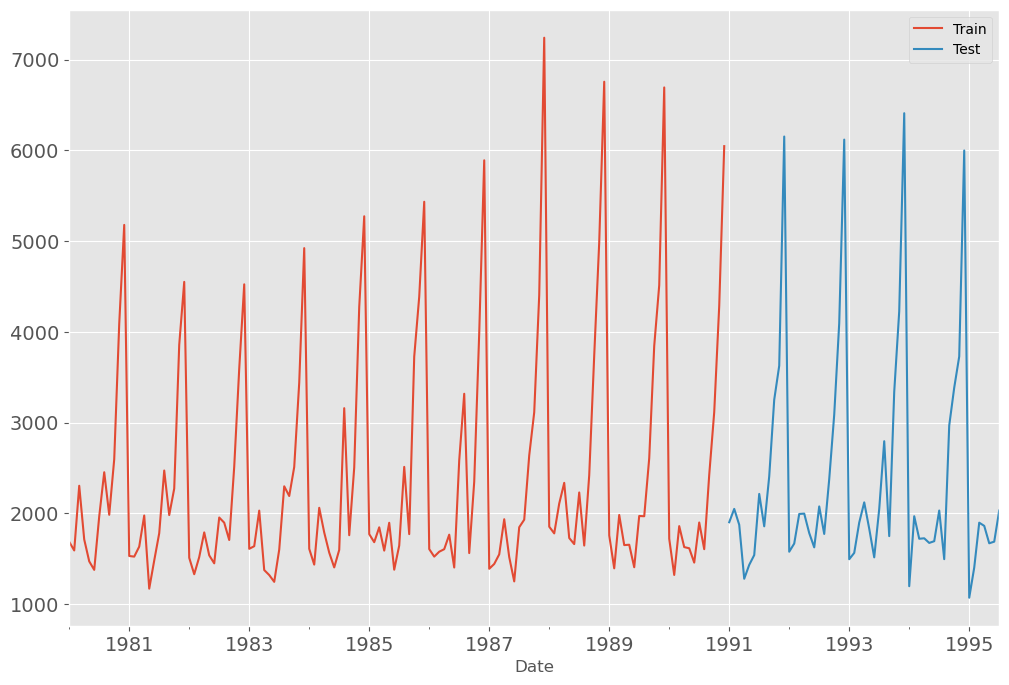

In [70]:
train['Sparkling'].plot(legend = True, label = 'Train', fontsize =14)
test['Sparkling'].plot(legend = True,label = 'Test', fontsize = 14);

#  Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

## Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression
    

## Model 2: Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡 

## Method 3: Simple Average

## Method 4: Moving Average(MA)

## Method 5: Simple Exponential Smoothing

## Method 6: Double Exponential Smoothing (Holt's Model)

## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

# Model 1: Linear Regression

In [71]:
train_time = [i+1 for i in range(len(train))] 
test_time = [i+43 for i in range(len(test))] 
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [72]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [73]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [74]:
display(LinearRegression_train.head())
display(LinearRegression_train.tail())

Sparkling  time
Date                       
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5

Sparkling  time
Date                       
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132

In [75]:
LinearRegression_test #55 months data

Sparkling  time
Date                       
1991-01-31       1902    43
1991-02-28       2049    44
1991-03-31       1874    45
1991-04-30       1279    46
1991-05-31       1432    47
1991-06-30       1540    48
1991-07-31       2214    49
1991-08-31       1857    50
1991-09-30       2408    51
1991-10-31       3252    52
1991-11-30       3627    53
1991-12-31       6153    54
1992-01-31       1577    55
1992-02-29       1667    56
1992-03-31       1993    57
1992-04-30       1997    58
1992-05-31       1783    59
1992-06-30       1625    60
1992-07-31       2076    61
1992-08-31       1773    62
1992-09-30       2377    63
1992-10-31       3088    64
1992-11-30       4096    65
1992-12-31       6119    66
1993-01-31       1494    67
1993-02-28       1564    68
1993-03-31       1898    69
1993-04-30       2121    70
1993-05-31       1831    71
1993-06-30       1515    72
1993-07-31       2048    73
1993-08-31       2795    74
1993-09-30       1749    75
1993-10-31       3339    76
1993-11-30       4227    77
1993-12-31       6410    78
1994-01-31       1197    79
1994-02-28       1968    80
1994-03-31       1720    81
1994-04-30       1725    82
1994-05-31       1674    83
1994-06-30       1693    84
1994-07-31       2031    85
1994-08-31       1495    86
1994-09-30       2968    87
1994-10-31       3385    88
1994-11-30       3729    89
1994-12-31       5999    90
1995-01-31       1070    91
1995-02-28       1402    92
1995-03-31       1897    93
1995-04-30       1862    94
1995-05-31       1670    95
1995-06-30       1688    96
1995-07-31       2031    97

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lr = LinearRegression()

In [78]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling']) 

LinearRegression()

In [79]:
test_predictions_model1= lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

In [80]:
LinearRegression_test.head(12)

Sparkling  time    RegOnTime
Date                                    
1991-01-31       1902    43  2266.712828
1991-02-28       2049    44  2272.545487
1991-03-31       1874    45  2278.378145
1991-04-30       1279    46  2284.210804
1991-05-31       1432    47  2290.043462
1991-06-30       1540    48  2295.876121
1991-07-31       2214    49  2301.708779
1991-08-31       1857    50  2307.541438
1991-09-30       2408    51  2313.374096
1991-10-31       3252    52  2319.206755
1991-11-30       3627    53  2325.039413
1991-12-31       6153    54  2330.872072

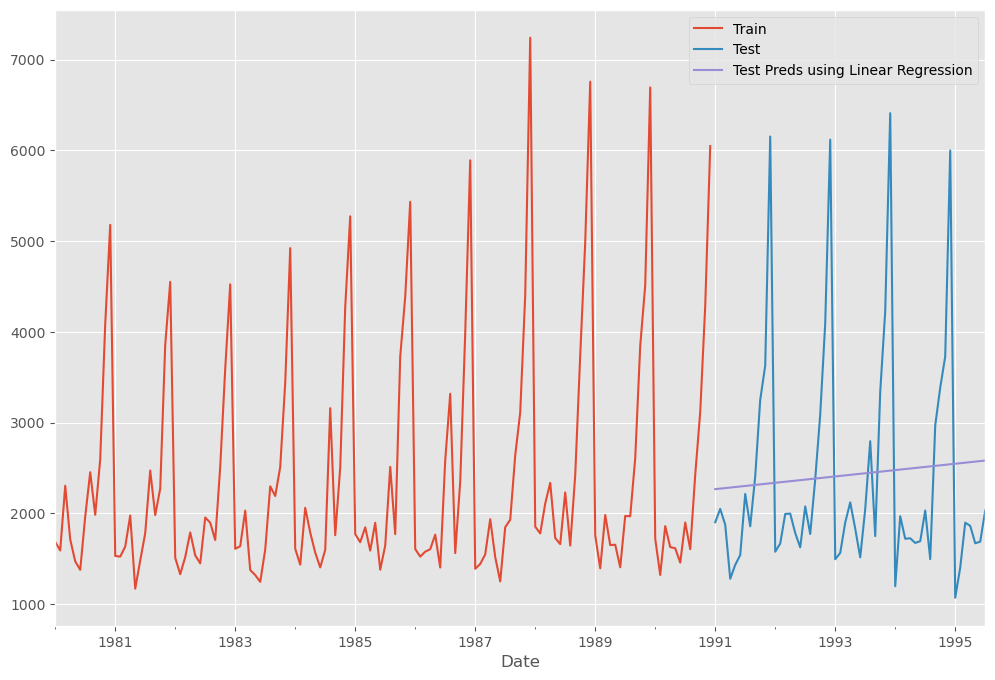

In [81]:
train['Sparkling'].plot(legend = True, label = 'Train')
test['Sparkling'].plot(legend = True, label = 'Test')
LinearRegression_test['RegOnTime'].plot(legend = True, 
                                        label = 'Test Preds using Linear Regression');

## Accuracy metrics

In [82]:
# from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse 
#sklearn.metrics mse, np.sqrt, mse(squared = False)

## Model Evaluation

In [83]:
## Test Data - RMSE

rmse_model1_test = rmse(test['Sparkling'],test_predictions_model1)
rmse_model1_test

1275.8670517560186

In [84]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},
                         index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  1275.867052

# Model 2: Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡 

In [85]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [86]:
# picking out the last value in train dataset
NaiveModel_test['naive'] = train['Sparkling'][len(train['Sparkling'])-1] 

In [87]:
NaiveModel_test['naive'].head()

Date
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Freq: M, Name: naive, dtype: int64

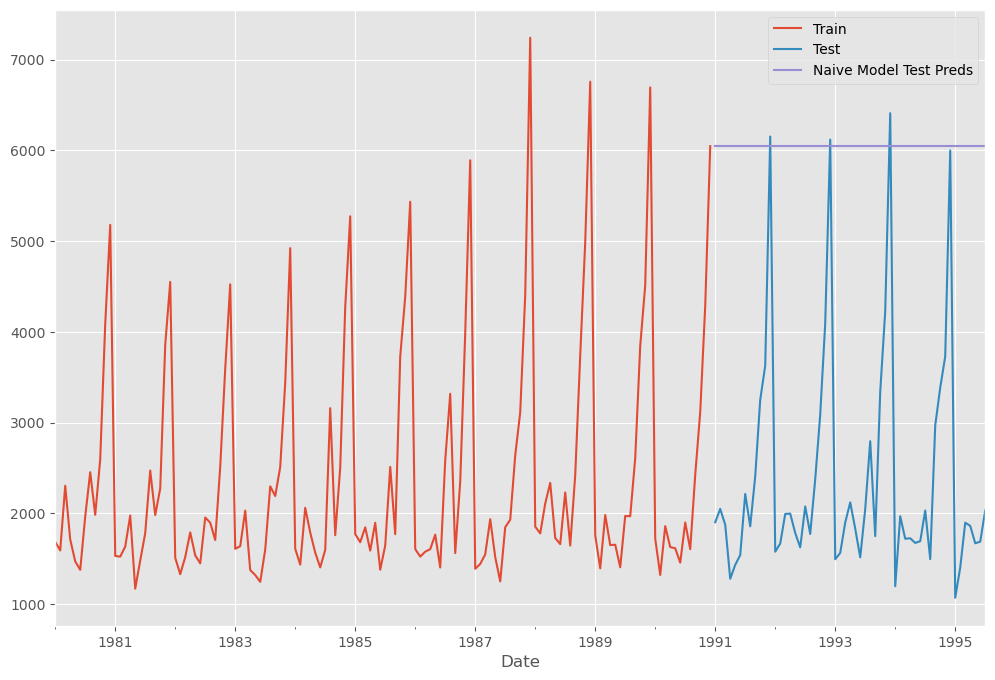

In [88]:
train['Sparkling'].plot(legend = True, label = 'Train')
test['Sparkling'].plot(legend = True, label = 'Test')
NaiveModel_test['naive'].plot(legend = True, label = 'Naive Model Test Preds');

## Model Evaluation

In [89]:
## Test Data - RMSE
rmse_model2_test=rmse(test['Sparkling'],NaiveModel_test['naive'])
rmse_model2_test

3864.2793518443914

In [90]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  1275.867052
NaiveModel        3864.279352

# Method 3: Simple Average

In [91]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [92]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Date                                
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

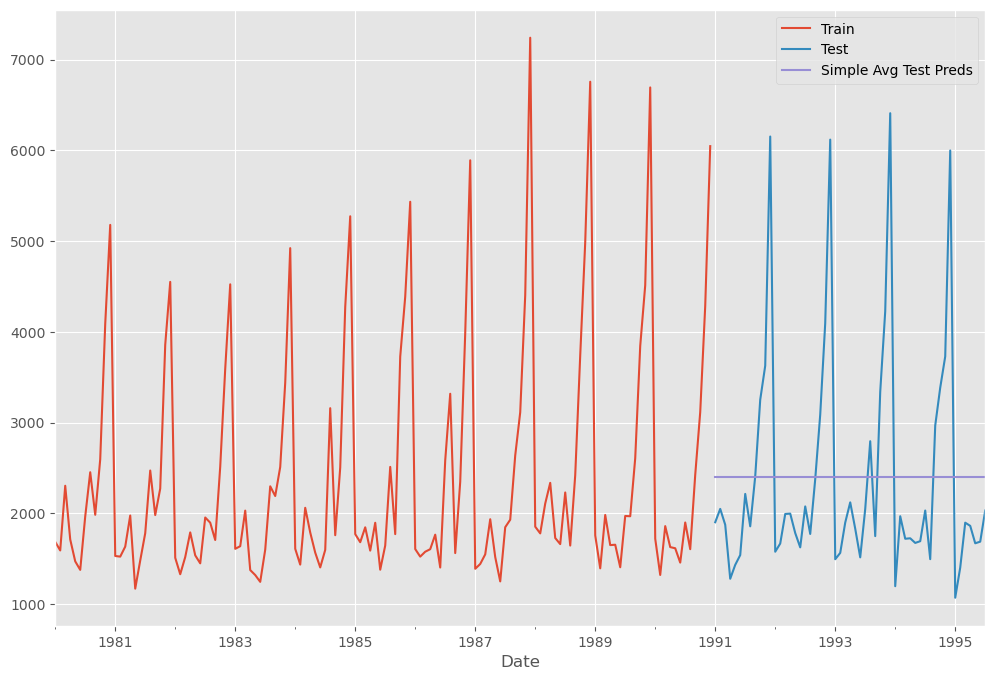

In [93]:
train['Sparkling'].plot(legend = True, label = 'Train')
test['Sparkling'].plot(legend = True, label = 'Test')
SimpleAverage_test['mean_forecast'].plot(legend=True,label= 'Simple Avg Test Preds');

## Model Evaluation

In [94]:
## Test Data - RMSE 
rmse_model3_test = rmse(test['Sparkling'], SimpleAverage_test['mean_forecast'])
rmse_model3_test

1275.0818036965309

In [95]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    1275.867052
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

# Method 4: Moving Average(MA)

In [96]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
Date                 
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

## Trailing moving averages

In [97]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head(10)

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
Date                                                                   
1980-01-31       1686         NaN         NaN          NaN          NaN
1980-02-29       1591      1638.5         NaN          NaN          NaN
1980-03-31       2304      1947.5         NaN          NaN          NaN
1980-04-30       1712      2008.0     1823.25          NaN          NaN
1980-05-31       1471      1591.5     1769.50          NaN          NaN
1980-06-30       1377      1424.0     1716.00  1690.166667          NaN
1980-07-31       1966      1671.5     1631.50  1736.833333          NaN
1980-08-31       2453      2209.5     1816.75  1880.500000          NaN
1980-09-30       1984      2218.5     1945.00  1827.166667  1838.222222
1980-10-31       2596      2290.0     2249.75  1974.500000  1939.333333

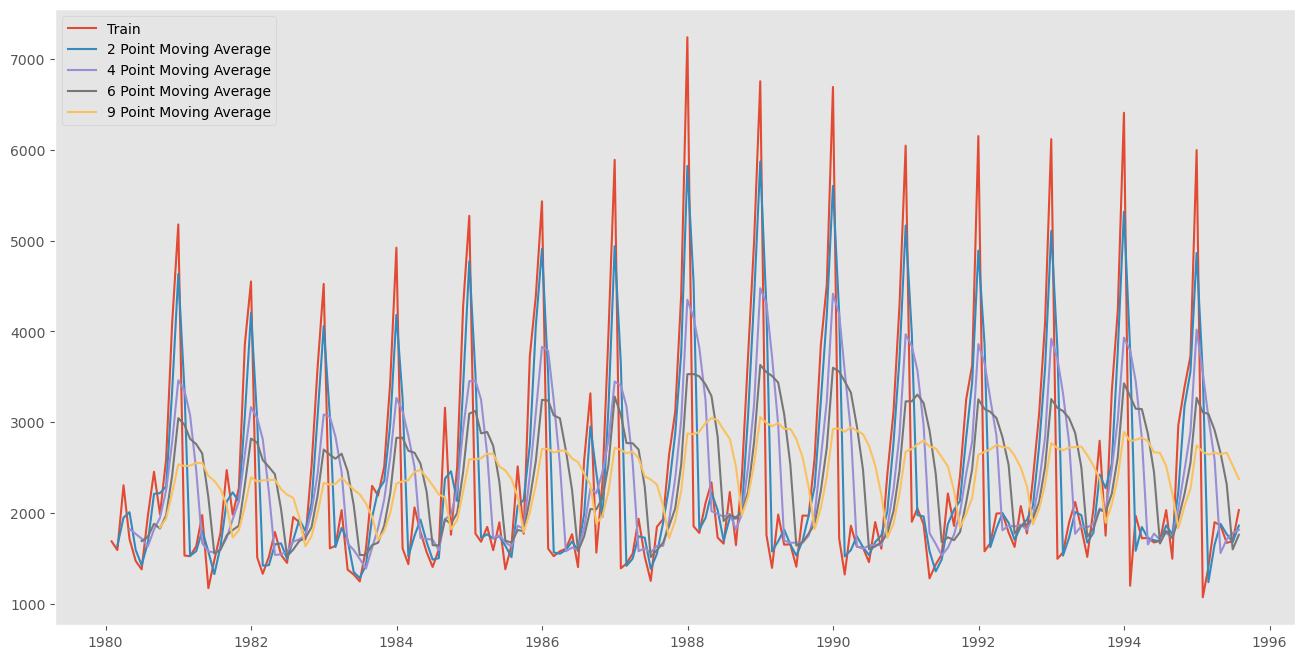

In [98]:
## Plotting on the whole data
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [99]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[df.index.year<1991] 
trailing_MovingAverage_test=MovingAverage[df.index.year>=1991]

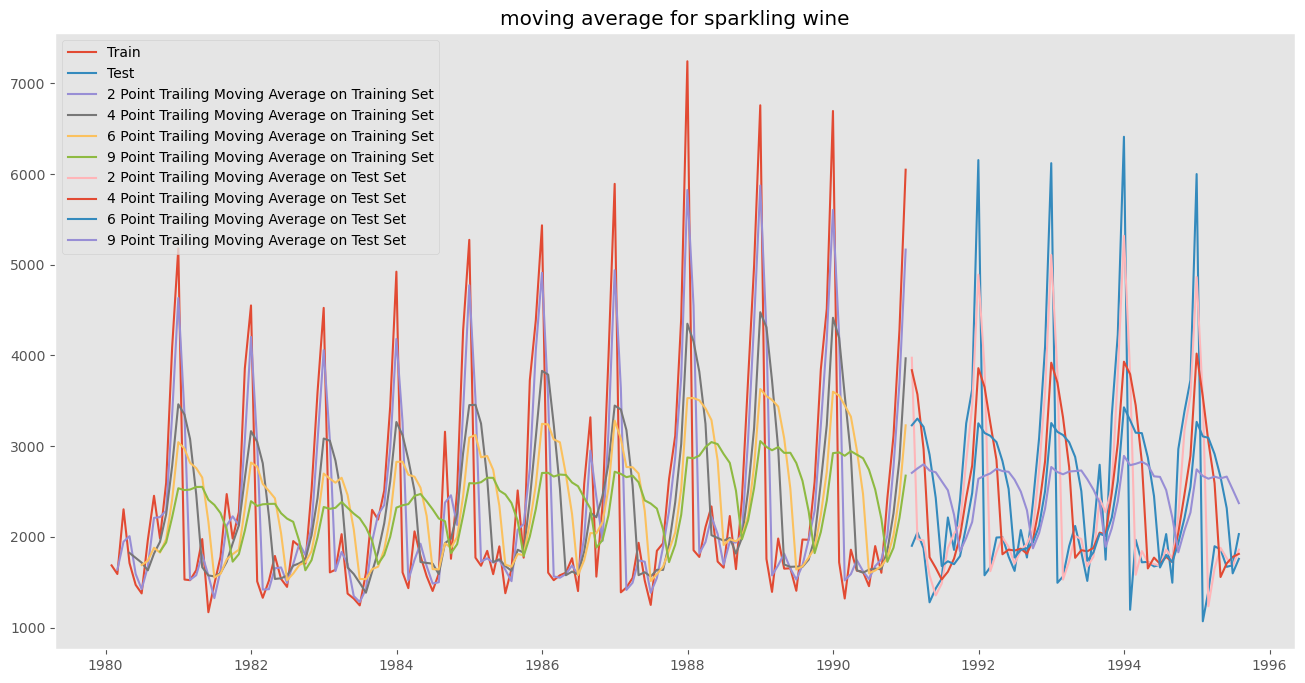

In [100]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.title('moving average for sparkling wine')
plt.grid();

## Model Evaluation
Done only on the test data.

In [101]:
## Test Data - RMSE --> 2 point Trailing MA
rmse_model4_test_2 = rmse(test['Sparkling'],
                          trailing_MovingAverage_test['Trailing_2'])
rmse_model4_test_2

813.4006839972983

In [102]:
## Test Data - RMSE  --> 4 point Trailing MA
rmse_model4_test_4 = rmse(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'])
rmse_model4_test_4

1156.589694081071

In [103]:
## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = rmse(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'])
rmse_model4_test_6

1283.9274280129855

In [104]:
## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = rmse(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'])
rmse_model4_test_9

1346.2783154241804

In [105]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2, 
                                          rmse_model4_test_4,
                                          rmse_model4_test_6, 
                                          rmse_model4_test_9]}, 
                           index=['2pointTrailingMovingAverage',
                                  '4pointTrailingMovingAverage', 
                                  '6pointTrailingMovingAverage',
                                  '9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             1275.867052
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

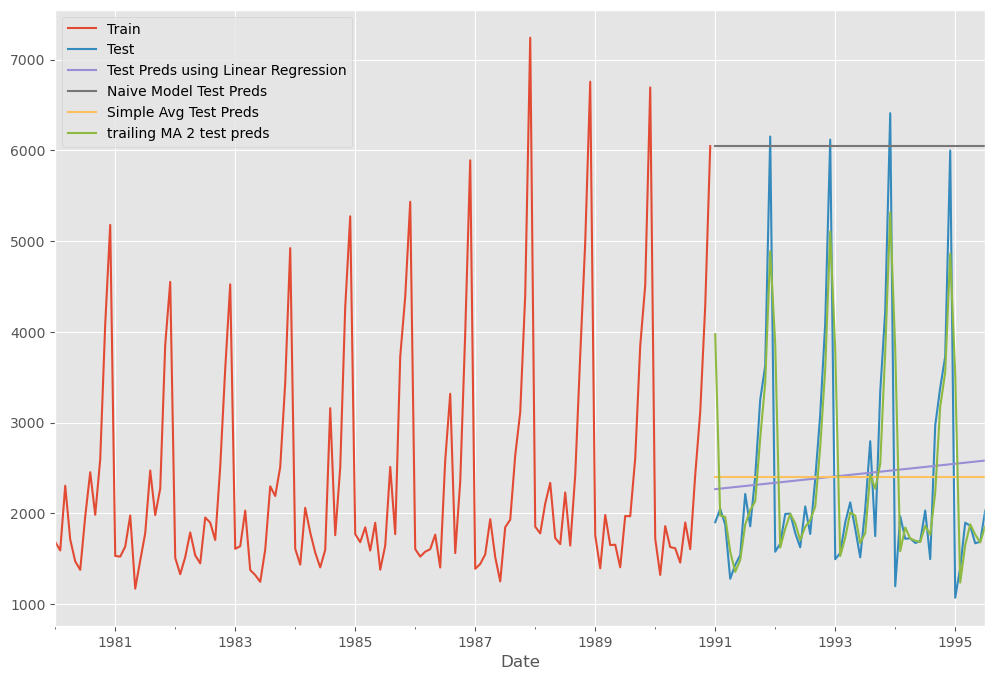

In [106]:
train['Sparkling'].plot(legend = True, label = 'Train')

test['Sparkling'].plot(legend = True, label = 'Test')

LinearRegression_test['RegOnTime'].plot(legend = True, 
                                        label = 'Test Preds using Linear Regression')

NaiveModel_test['naive'].plot(legend = True, 
                              label = 'Naive Model Test Preds')

SimpleAverage_test['mean_forecast'].plot(legend=True,
                                         label= 'Simple Avg Test Preds')

trailing_MovingAverage_test['Trailing_2'].plot(legend=True,
                                              label ='trailing MA 2 test preds');

# Method 5: Simple Exponential Smoothing

In [107]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [108]:
SES_train = train.copy()
SES_test = test.copy()

In [109]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [110]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\suloc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [111]:
model_SES_autofit.params

{'smoothing_level': 0.049606598807459476,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047538435326,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [112]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test)).round(0)
SES_test.head()

Sparkling  predict
Date                          
1991-01-31       1902   2725.0
1991-02-28       2049   2725.0
1991-03-31       1874   2725.0
1991-04-30       1279   2725.0
1991-05-31       1432   2725.0

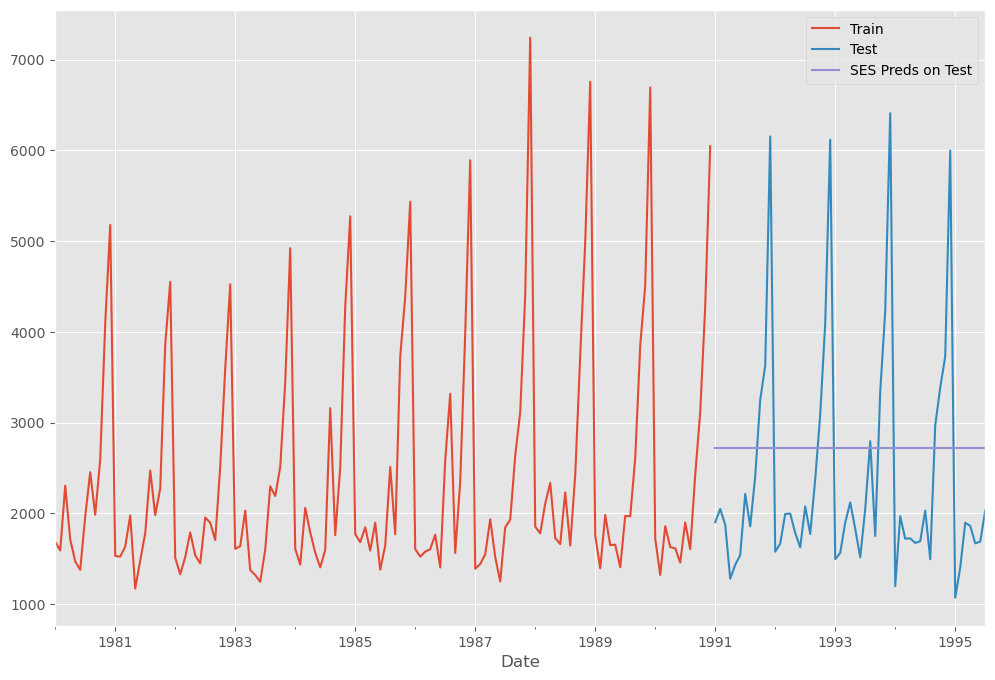

In [113]:
SES_train['Sparkling'].plot(legend=True, label = 'Train')
SES_test['Sparkling'].plot(legend=True, label = 'Test')
SES_test['predict'].plot(legend=True, label = 'SES Preds on Test');

## Model Evaluation for Simple Exponential Smoothing

In [114]:
## Test Data
rmse_model5_test_1 = rmse(SES_test['Sparkling'],SES_test['predict'])
rmse_model5_test_1

1316.0521680734807

In [115]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},
                           index=['Alpha= 0.049,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                         1275.867052
NaiveModel                               3864.279352
SimpleAverageModel                       1275.081804
2pointTrailingMovingAverage               813.400684
4pointTrailingMovingAverage              1156.589694
6pointTrailingMovingAverage              1283.927428
9pointTrailingMovingAverage              1346.278315
Alpha= 0.049,SimpleExponentialSmoothing  1316.052168

In [116]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [117]:
alpha_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9] 

In [118]:
for i in alpha_list:
    model_SES_alpha_i = model_SES.fit(smoothing_level=i)
    
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues.round(0)
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test)).round(0)
    
    rmse_model5_train_i = np.round(rmse(SES_train['Sparkling'],SES_train['predict',i]),0)
    
    rmse_model5_test_i = np.round(rmse(SES_test['Sparkling'],SES_test['predict',i]),0)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,
                                      'Train RMSE': rmse_model5_train_i,
                                      'Test RMSE':rmse_model5_test_i}, 
                                     ignore_index=True)

In [119]:
 rmse_model5_test_i 

3686.0

In [120]:
SES_test.head()

Sparkling  predict  (predict, 0.3)  (predict, 0.4)  \
Date                                                             
1991-01-31       1902   2725.0          3855.0          4328.0   
1991-02-28       2049   2725.0          3855.0          4328.0   
1991-03-31       1874   2725.0          3855.0          4328.0   
1991-04-30       1279   2725.0          3855.0          4328.0   
1991-05-31       1432   2725.0          3855.0          4328.0   

            (predict, 0.5)  (predict, 0.6)  (predict, 0.7)  (predict, 0.8)  \
Date                                                                         
1991-01-31          4741.0          5092.0          5389.0          5641.0   
1991-02-28          4741.0          5092.0          5389.0          5641.0   
1991-03-31          4741.0          5092.0          5389.0          5641.0   
1991-04-30          4741.0          5092.0          5389.0          5641.0   
1991-05-31          4741.0          5092.0          5389.0          5641.0   

            (predict, 0.9)  
Date                        
1991-01-31          5858.0  
1991-02-28          5858.0  
1991-03-31          5858.0  
1991-04-30          5858.0  
1991-05-31          5858.0

## Model Evaluation

In [121]:
resultsDf_6.round(1)

Alpha Values  Train RMSE  Test RMSE
0           0.3      1359.0     1935.0
1           0.4      1353.0     2312.0
2           0.5      1344.0     2666.0
3           0.6      1339.0     2979.0
4           0.7      1339.0     3250.0
5           0.8      1345.0     3484.0
6           0.9      1356.0     3686.0

In [122]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
0           0.3      1359.0     1935.0
1           0.4      1353.0     2312.0
2           0.5      1344.0     2666.0
3           0.6      1339.0     2979.0
4           0.7      1339.0     3250.0
5           0.8      1345.0     3484.0
6           0.9      1356.0     3686.0

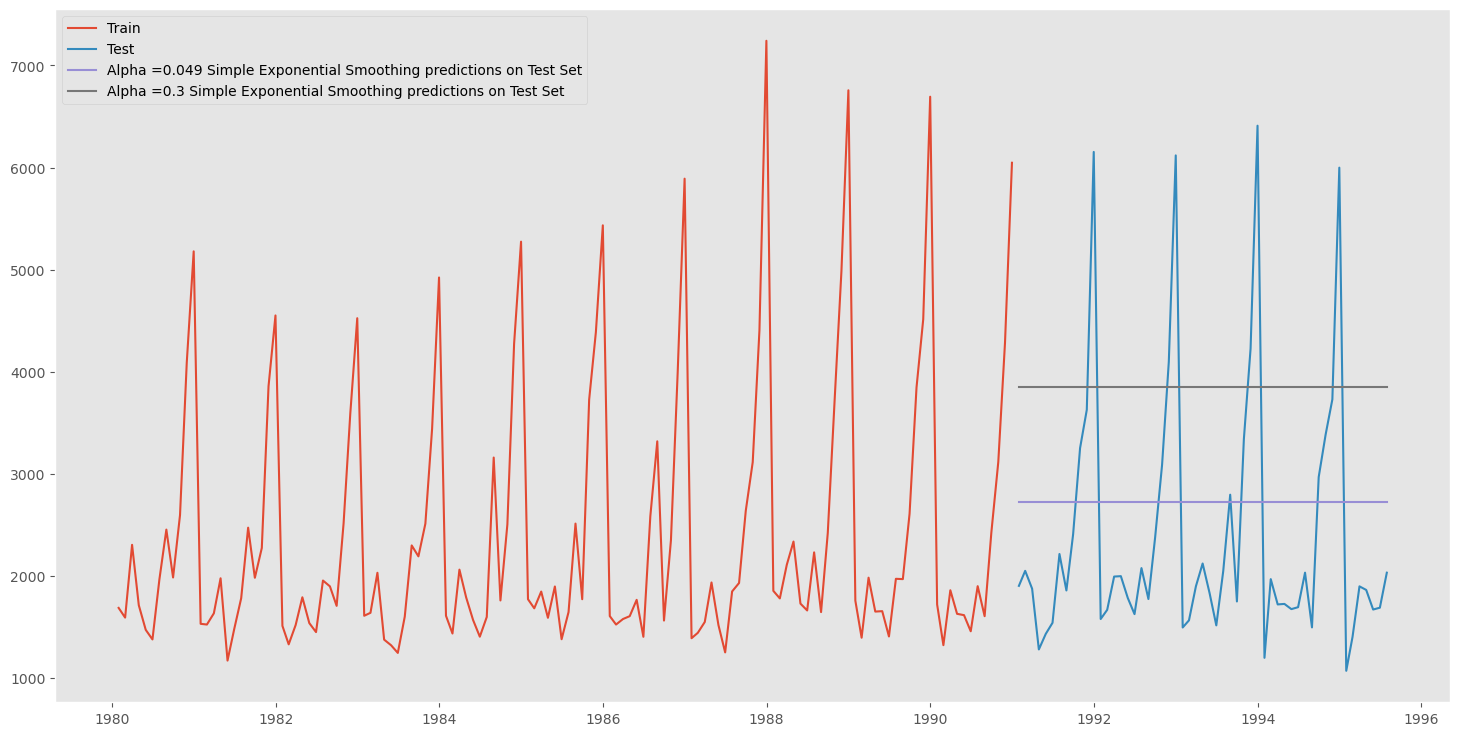

In [123]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.049 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [124]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],
 ascending=True).values[0][2]]},
                             index = ['Alpha=0.3,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                         1275.867052
NaiveModel                               3864.279352
SimpleAverageModel                       1275.081804
2pointTrailingMovingAverage               813.400684
4pointTrailingMovingAverage              1156.589694
6pointTrailingMovingAverage              1283.927428
9pointTrailingMovingAverage              1346.278315
Alpha= 0.049,SimpleExponentialSmoothing  1316.052168
Alpha=0.3,SimpleExponentialSmoothing     1935.000000

# Method 6: Double Exponential Smoothing (Holt's Model)

In [125]:
DES_train = train.copy()
DES_test = test.copy()

In [126]:
model_DES = Holt(DES_train['Sparkling'])

## Identifying Optimum Values of  𝛼  &  𝛽

In [127]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [128]:
alpha_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
beta_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [129]:
for i in alpha_list:
    for j in beta_list:
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j)
        
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model6_train = rmse(DES_train['Sparkling'],DES_train['predict',i,j])
        
        rmse_model6_test = rmse(DES_test['Sparkling'],DES_test['predict',i,j])
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,
                                          'Beta Values':j,
                                          'Train RMSE': rmse_model6_train,
                                          'Test RMSE': rmse_model6_test}, ignore_index=True)

In [130]:
resultsDf_7.round(1)

Alpha Values  Beta Values  Train RMSE  Test RMSE
0            0.3          0.3      1590.2    18259.1
1            0.3          0.4      1680.8    26069.8
2            0.3          0.5      1770.5    34401.5
3            0.3          0.6      1847.9    42162.7
4            0.3          0.7      1899.7    47832.4
..           ...          ...         ...        ...
59           1.0          0.6      1753.4    49327.1
60           1.0          0.7      1825.2    52655.8
61           1.0          0.8      1902.0    55442.3
62           1.0          0.9      1985.4    57823.2
63           1.0          1.0      2077.6    59877.1

[64 rows x 4 columns]

In [131]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.3          0.3  1590.151687  18259.110704
8            0.4          0.3  1568.527728  23878.496940
1            0.3          0.4  1680.813420  26069.841401
16           0.5          0.3  1530.223975  27095.532414
24           0.6          0.3  1506.223118  29070.722592

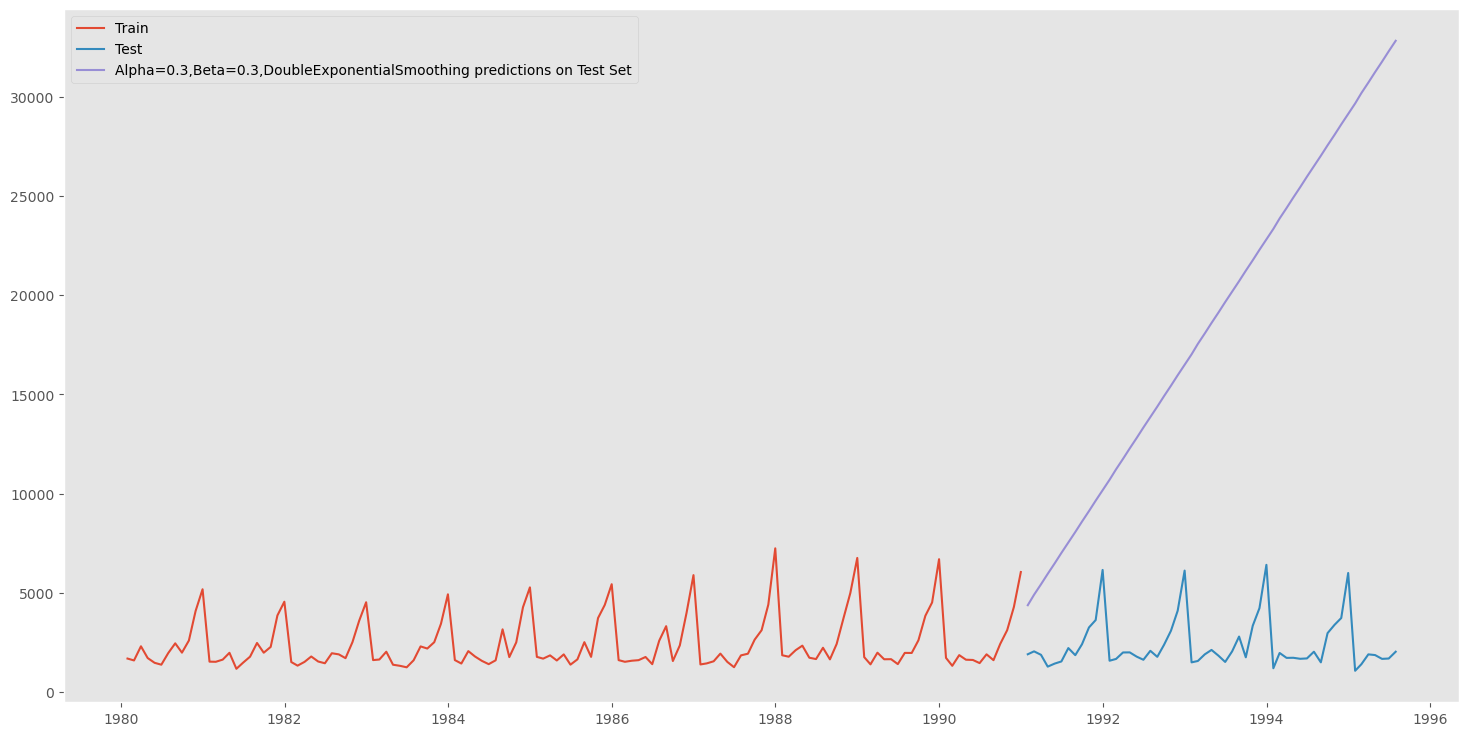

In [132]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3],
         label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [133]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                                1275.867052
NaiveModel                                      3864.279352
SimpleAverageModel                              1275.081804
2pointTrailingMovingAverage                      813.400684
4pointTrailingMovingAverage                     1156.589694
6pointTrailingMovingAverage                     1283.927428
9pointTrailingMovingAverage                     1346.278315
Alpha= 0.049,SimpleExponentialSmoothing         1316.052168
Alpha=0.3,SimpleExponentialSmoothing            1935.000000
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  18259.110704

# Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [134]:
TES_train = train.copy()
TES_test = test.copy()

In [135]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],
                                 trend='additive',
                                 seasonal='multiplicative',freq='M')

In [136]:
model_TES_autofit = model_TES.fit()

In [137]:
model_TES_autofit.params

{'smoothing_level': 0.11101677395783265,
 'smoothing_trend': 0.049316382632581326,
 'smoothing_seasonal': 0.3624389131056697,
 'damping_trend': nan,
 'initial_level': 2356.4978867323553,
 'initial_trend': -9.787302694315414,
 'initial_seasons': array([0.7135243 , 0.68298624, 0.90486849, 0.8056077 , 0.65585195,
        0.65409923, 0.88620874, 1.13360552, 0.91938008, 1.21194659,
        1.87102251, 2.37567892]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [138]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test)).round(0)

TES_test.head()

Sparkling  auto_predict
Date                               
1991-01-31       1902        1588.0
1991-02-28       2049        1357.0
1991-03-31       1874        1763.0
1991-04-30       1279        1657.0
1991-05-31       1432        1542.0

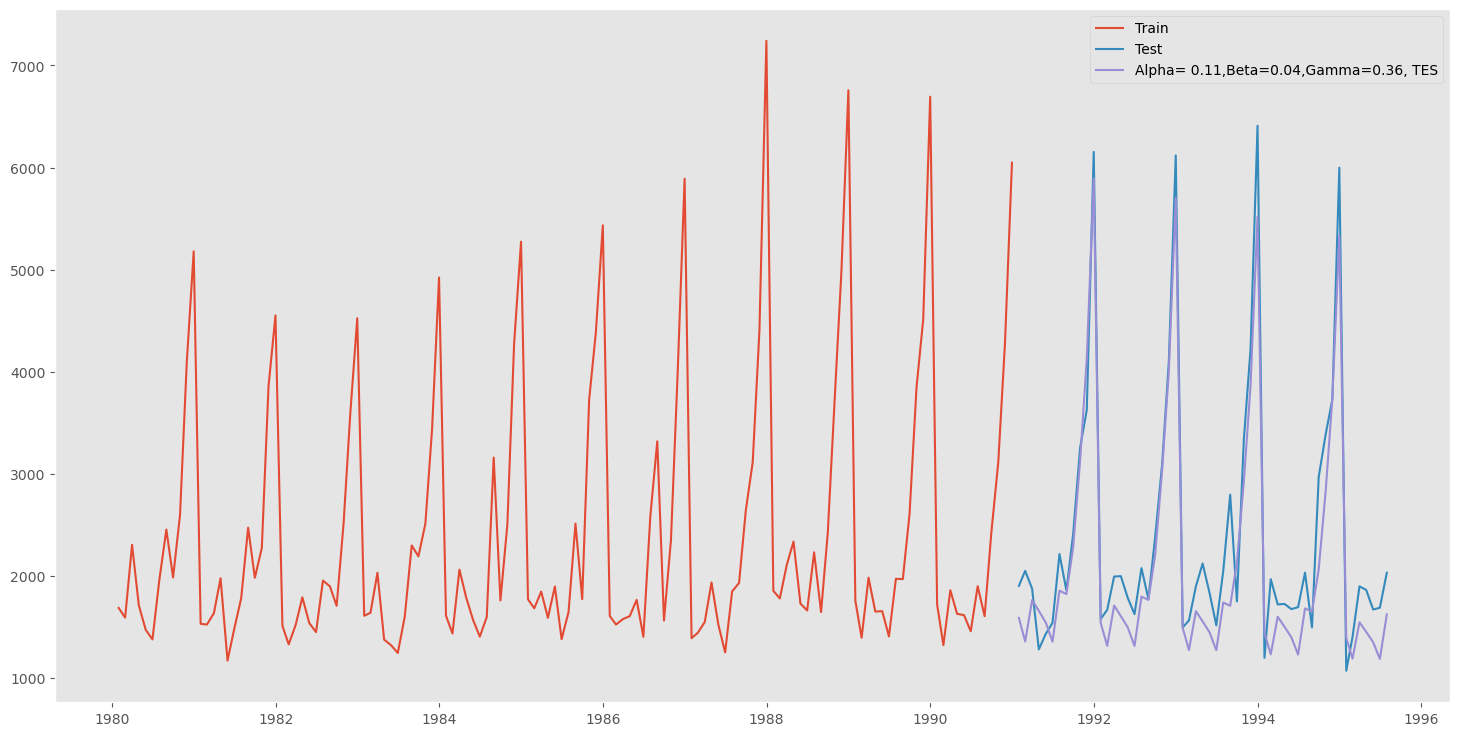

In [139]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha= 0.11,Beta=0.04,Gamma=0.36, TES')

plt.legend(loc='best')
plt.grid();

In [140]:
## Test Data

rmse_model6_test_1 = rmse(TES_test['Sparkling'],
                          TES_test['auto_predict'])
rmse_model6_test_1

402.923001893098

In [141]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha= 0.11,Beta=0.04,Gamma=0.36,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf.round(0)

Test RMSE
RegressionOnTime                                       1276.0
NaiveModel                                             3864.0
SimpleAverageModel                                     1275.0
2pointTrailingMovingAverage                             813.0
4pointTrailingMovingAverage                            1157.0
6pointTrailingMovingAverage                            1284.0
9pointTrailingMovingAverage                            1346.0
Alpha= 0.049,SimpleExponentialSmoothing                1316.0
Alpha=0.3,SimpleExponentialSmoothing                   1935.0
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing         18259.0
Alpha= 0.11,Beta=0.04,Gamma=0.36,TripleExponent...      403.0

## Identifying Optimum Values of  𝛼 ,  𝛽  and  𝛾 

In [142]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],
                              'Beta Values':[],
                              'Gamma Values':[],
                              'Train RMSE':[],
                              'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [143]:
gamma_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [144]:
for i in alpha_list:
    for j in beta_list:
        for k in gamma_list:
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,
                                                  smoothing_trend=j,
                                                  smoothing_seasonal=k)
            
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = rmse(TES_train['Sparkling'],
                                     TES_train['predict',i,j,k])
            
            rmse_model8_test = rmse(TES_test['Sparkling'],
                                    TES_test['predict',i,j,k])
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,
                                                  'Beta Values':j,
                                                  'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,
                                                  'Test RMSE':rmse_model8_test},ignore_index=True)

C:\Users\suloc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\suloc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\suloc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\suloc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\suloc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\suloc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to co

In [145]:
TES_test.head().round(0)

Sparkling  auto_predict  (predict, 0.3, 0.3, 0.3)  \
Date                                                            
1991-01-31       1902        1588.0                    1445.0   
1991-02-28       2049        1357.0                    1259.0   
1991-03-31       1874        1763.0                    1658.0   
1991-04-30       1279        1657.0                    1592.0   
1991-05-31       1432        1542.0                    1514.0   

            (predict, 0.3, 0.3, 0.4)  (predict, 0.3, 0.3, 0.5)  \
Date                                                             
1991-01-31                    1407.0                    1397.0   
1991-02-28                    1165.0                    1104.0   
1991-03-31                    1555.0                    1487.0   
1991-04-30                    1445.0                    1332.0   
1991-05-31                    1383.0                    1276.0   

            (predict, 0.3, 0.3, 0.6)  (predict, 0.3, 0.3, 0.7)  \
Date                                                             
1991-01-31                    1411.0                    1457.0   
1991-02-28                    1070.0                    1081.0   
1991-03-31                    1442.0                    1460.0   
1991-04-30                    1245.0                    1232.0   
1991-05-31                    1187.0                    1172.0   

            (predict, 0.3, 0.3, 0.8)  (predict, 0.3, 0.3, 0.9)  \
Date                                                             
1991-01-31                    1520.0                    1572.0   
1991-02-28                    1123.0                    1163.0   
1991-03-31                    1531.0                    1596.0   
1991-04-30                    1292.0                    1368.0   
1991-05-31                    1233.0                    1317.0   

            (predict, 0.3, 0.3, 1.0)  ...  (predict, 1.0, 0.9, 0.9)  \
Date                                  ...                             
1991-01-31                    1477.0  ...                  -11609.0   
1991-02-28                     871.0  ...                   -8580.0   
1991-03-31                     931.0  ...                  -73143.0   
1991-04-30                     631.0  ...                   17746.0   
1991-05-31                     466.0  ...                    1617.0   

            (predict, 1.0, 0.9, 1.0)  (predict, 1.0, 1.0, 0.3)  \
Date                                                             
1991-01-31                   -1445.0                   -3552.0   
1991-02-28                    1137.0                   -5984.0   
1991-03-31                   -1322.0                  -14913.0   
1991-04-30                    1183.0                  -31170.0   
1991-05-31                   -1584.0                 -305980.0   

            (predict, 1.0, 1.0, 0.4)  (predict, 1.0, 1.0, 0.5)  \
Date                                                             
1991-01-31                  -40829.0                  -10400.0   
1991-02-28                  392353.0                   -7263.0   
1991-03-31                   81702.0                    -585.0   
1991-04-30                 -160180.0                   38403.0   
1991-05-31                 -272138.0                 -125008.0   

            (predict, 1.0, 1.0, 0.6)  (predict, 1.0, 1.0, 0.7)  \
Date                                                             
1991-01-31                   -6686.0                  -43317.0   
1991-02-28                   -7363.0                   60124.0   
1991-03-31                   12904.0                  361859.0   
1991-04-30                  -14039.0                  464778.0   
1991-05-31                   42092.0                 2486380.0   

            (predict, 1.0, 1.0, 0.8)  (predict, 1.0, 1.0, 0.9)  \
Date                                                             
1991-01-31                     392.0                     -91.0   
1991-02-28                      14.0                    -631.0   
1991-03-31      

In [146]:
resultsDf_8_2.round(1)

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
0             0.3          0.3           0.3       392.5      343.9
1             0.3          0.3           0.4       397.5      826.7
2             0.3          0.3           0.5       407.9     1476.3
3             0.3          0.3           0.6       426.3     2145.7
4             0.3          0.3           0.7       451.3     2459.4
..            ...          ...           ...         ...        ...
507           1.0          1.0           0.6    188299.4  4386054.2
508           1.0          1.0           0.7    266001.5  8649577.3
509           1.0          1.0           0.8   1101923.4   270043.5
510           1.0          1.0           0.9     76957.1   247220.1
511           1.0          1.0           1.0     24560.5   125691.4

[512 rows x 5 columns]

In [147]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
0             0.3          0.3           0.3  392.544418  343.884469
99            0.4          0.7           0.6  697.776413  374.740235
66            0.4          0.3           0.5  439.468779  400.229186
139           0.5          0.4           0.6  580.030419  438.610539
131           0.5          0.3           0.6  522.263919  444.718105

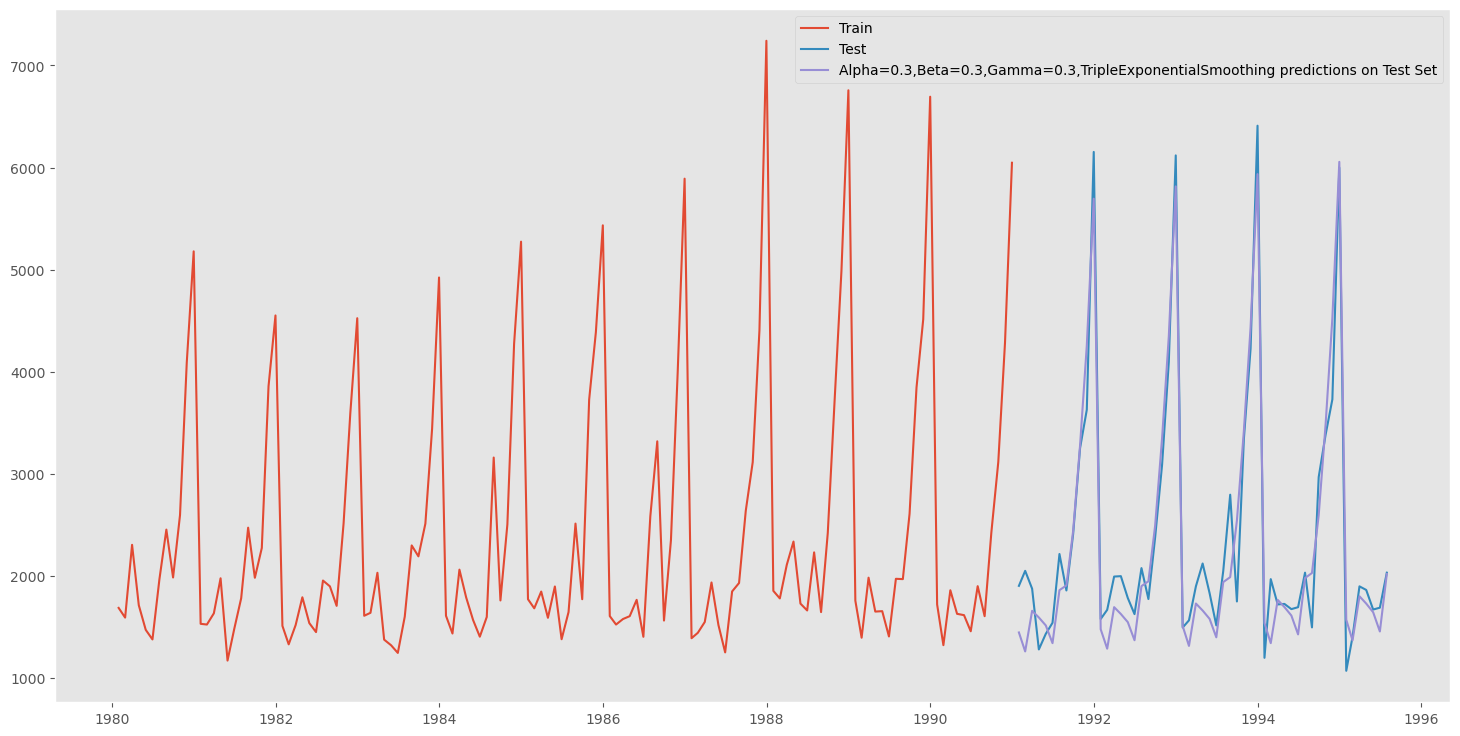

In [148]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')


plt.plot(TES_test['predict', 0.3, 0.3, 0.3], 
         label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [149]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf.round(0)

Test RMSE
RegressionOnTime                                       1276.0
NaiveModel                                             3864.0
SimpleAverageModel                                     1275.0
2pointTrailingMovingAverage                             813.0
4pointTrailingMovingAverage                            1157.0
6pointTrailingMovingAverage                            1284.0
9pointTrailingMovingAverage                            1346.0
Alpha= 0.049,SimpleExponentialSmoothing                1316.0
Alpha=0.3,SimpleExponentialSmoothing                   1935.0
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing         18259.0
Alpha= 0.11,Beta=0.04,Gamma=0.36,TripleExponent...      403.0
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...      344.0

In [150]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE']).round(0)

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...      344.0
Alpha= 0.11,Beta=0.04,Gamma=0.36,TripleExponent...      403.0
2pointTrailingMovingAverage                             813.0
4pointTrailingMovingAverage                            1157.0
SimpleAverageModel                                     1275.0
RegressionOnTime                                       1276.0
6pointTrailingMovingAverage                            1284.0
Alpha= 0.049,SimpleExponentialSmoothing                1316.0
9pointTrailingMovingAverage                            1346.0
Alpha=0.3,SimpleExponentialSmoothing                   1935.0
NaiveModel                                             3864.0
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing         18259.0

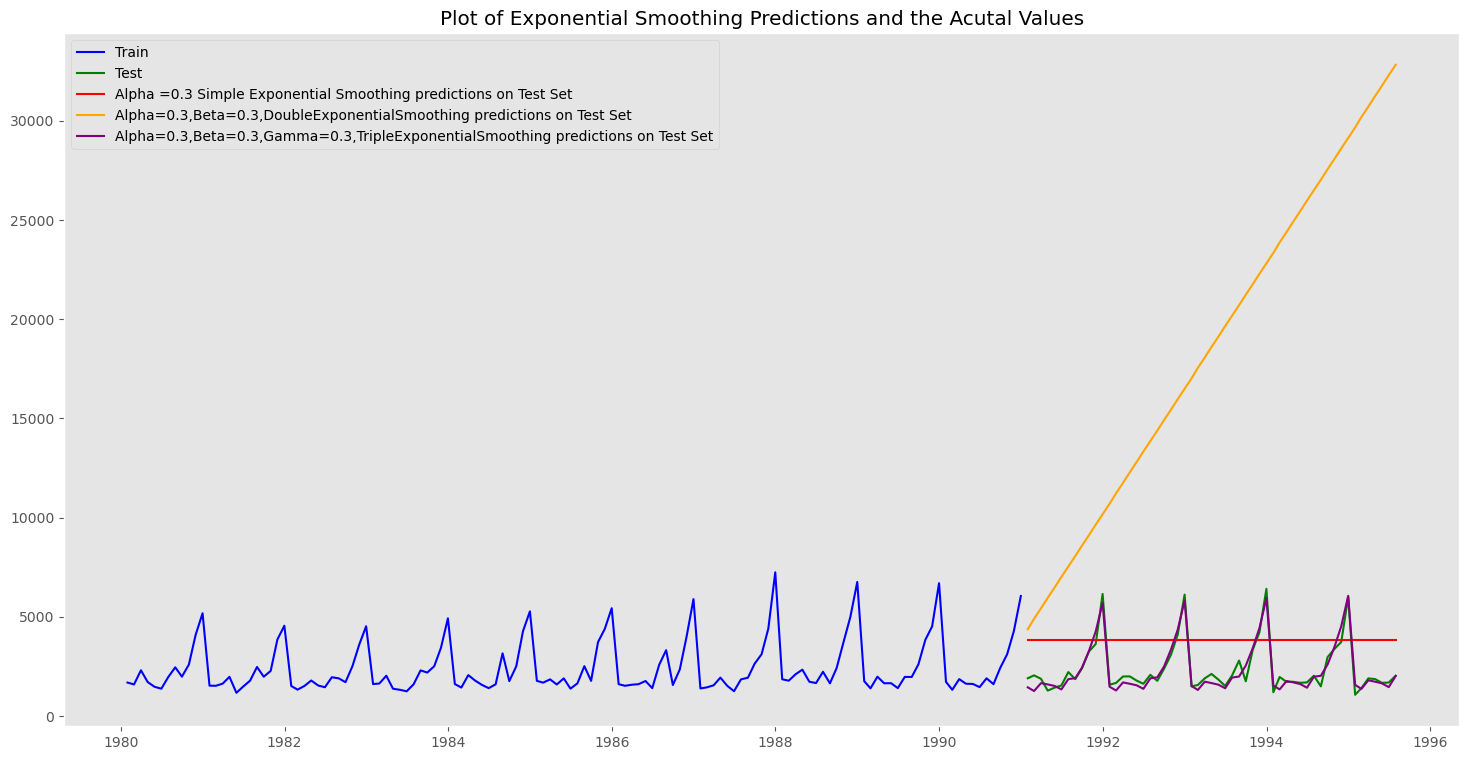

In [152]:
## Plotting on both the Training and Test data and comparing the 3 exponential models

 #from turtle import color


plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train', color='blue')
plt.plot(test['Sparkling'], label='Test', color='green')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set', color='red')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set',color='orange')

plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set',color='purple')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

#  Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

## Check for stationarity of the whole Time Series data.

In [153]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller

In [154]:
adfuller(df['Sparkling'])[1]

0.6010608871634863

In [155]:
#Perform Dickey-Fuller test: Ho : There is no stationarity

# Formatting the output

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df['Sparkling'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

print (dfoutput,'\n')

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



We see that at 5% significance level the Time Series is non-stationary as at high p-value we are unable to reject the null hypothesis.

In [156]:
# Let us take a difference of order 1 and check whether the Time Series is stationary or not.
df['Sparkling'].diff()

Date
1980-01-31      NaN
1980-02-29    -95.0
1980-03-31    713.0
1980-04-30   -592.0
1980-05-31   -241.0
              ...  
1995-03-31    495.0
1995-04-30    -35.0
1995-05-31   -192.0
1995-06-30     18.0
1995-07-31    343.0
Freq: M, Name: Sparkling, Length: 187, dtype: float64

In [157]:
adfuller(df['Sparkling'].diff().dropna())[1] # d -->1

0.0

We see that at  𝛼  = 0.05 the Time Series is indeed stationary as the p-value is lower than 0.05 and hence we can reject the null hypothesis which says that the time series is not stationary. So differentiation by 1 makes the time series stationary.

#  Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

## Autocorrelation & Partial Autocorrelation function

In [158]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

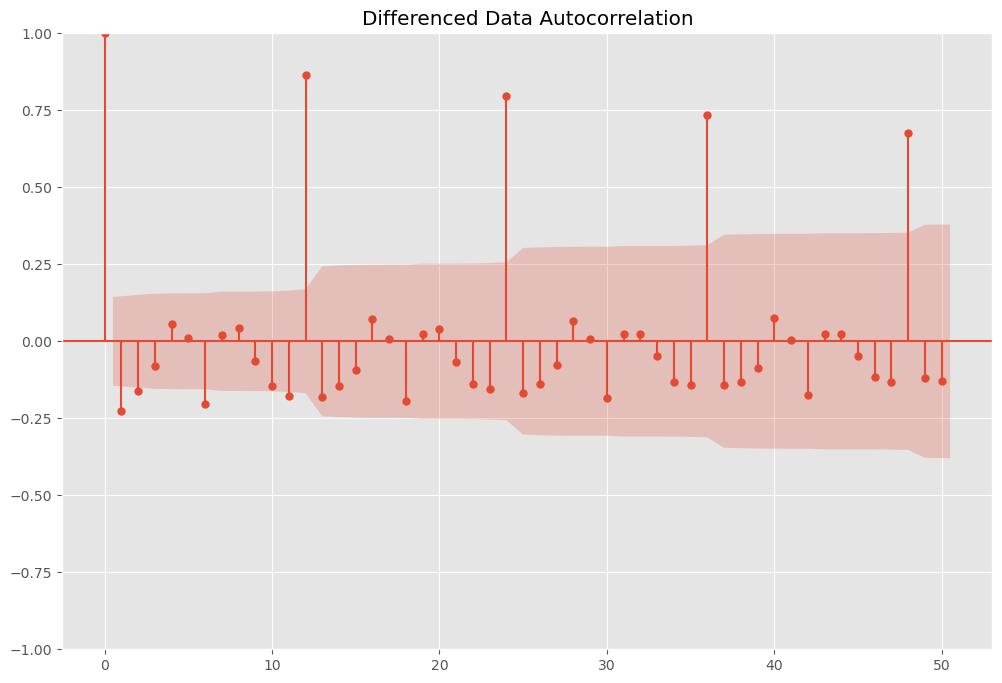

In [159]:
plot_acf(df['Sparkling'].diff().dropna(),
         lags=50,
         title='Differenced Data Autocorrelation');

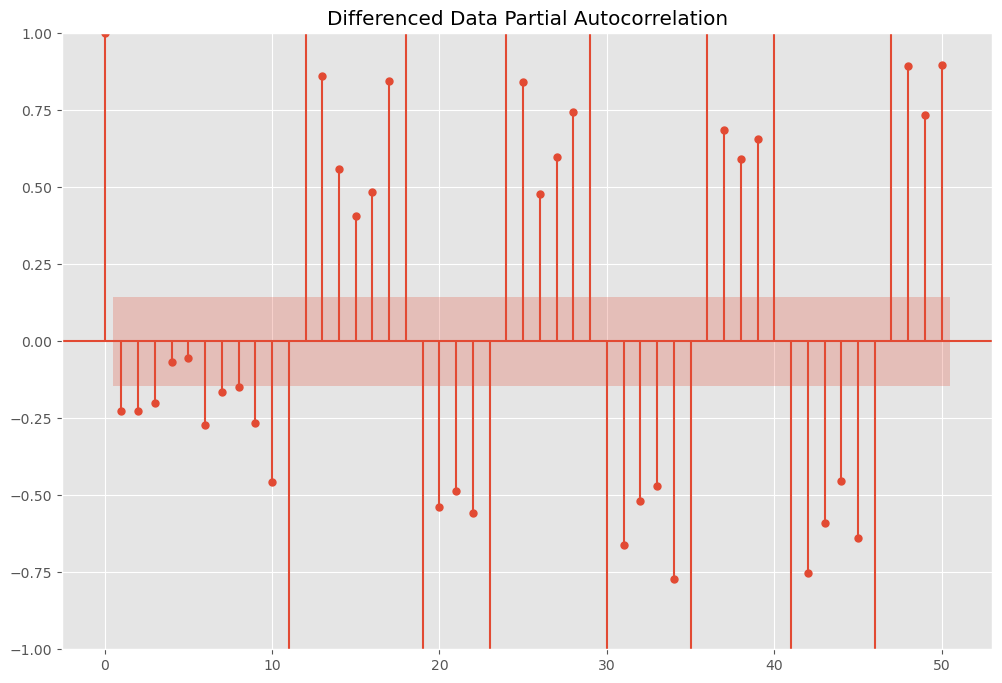

In [160]:
plot_pacf(df['Sparkling'].diff().dropna(),
          lags=50,
          title='Differenced Data Partial Autocorrelation');

## Check for stationarity of the Training Data Time Series.

In [161]:
adfuller(train['Sparkling'])[1] # gives p-value

0.6697444263523331

We see that the series is not stationary at  𝛼  = 0.05.

In [162]:
adfuller(train['Sparkling'].diff().dropna())[1]

2.2801043558263994e-12

# Automated version of an ARIMA model : Based on lowest Akaike Information Criteria (AIC).

In [163]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we already know that we need to take a first order difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)  

pdq = list(itertools.product(p, d, q))

print('Some parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print(f'Model: {pdq[i]}')

Some parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [164]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [165]:
from statsmodels.tsa.arima.model import ARIMA # statsmodels.tsa.arima_model

In [166]:
for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'],
                        order=param).fit()
    
    print(f'ARIMA{param} - AIC:{ARIMA_model.aic}')
    
    ARIMA_AIC=ARIMA_AIC.append({'param':param, 
                                'AIC': ARIMA_model.aic},
                               ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155918473
ARIMA(0, 1, 2) - AIC:2234.4083231282916
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946777883
ARIMA(1, 1, 2) - AIC:2234.527200451911
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.7776262167617
ARIMA(2, 1, 2) - AIC:2213.5092125013252


In [167]:
ARIMA_AIC

param          AIC
0  (0, 1, 0)  2267.663036
1  (0, 1, 1)  2263.060016
2  (0, 1, 2)  2234.408323
3  (1, 1, 0)  2266.608539
4  (1, 1, 1)  2235.755095
5  (1, 1, 2)  2234.527200
6  (2, 1, 0)  2260.365744
7  (2, 1, 1)  2233.777626
8  (2, 1, 2)  2213.509213

In [168]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2213.509213
7  (2, 1, 1)  2233.777626
2  (0, 1, 2)  2234.408323
5  (1, 1, 2)  2234.527200
4  (1, 1, 1)  2235.755095
6  (2, 1, 0)  2260.365744
1  (0, 1, 1)  2263.060016
3  (1, 1, 0)  2266.608539
0  (0, 1, 0)  2267.663036

In [169]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

results_auto_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 25 Dec 2022   AIC                           2213.509
Time:                        18:57:39   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.216      0.000      -2.206      -1.777
ma.L2          0.9999      0.110      9.108      0.000       0.785       1.215
sigma2      1.099e+06   1.99e-07   5.51e+12      0.000     1.1e+06     1.1e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                14.46
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               2.43   Skew:                             0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.15e+27. Standard errors may be unstable.
"""

## Predict on the Test Set & Evaluation - Auto Arima Model

In [170]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [171]:
predicted_auto_ARIMA

1991-01-31    4252.360184
1991-02-28    2863.101715
1991-03-31    2043.977319
1991-04-30    1746.203340
1991-05-31    1813.624573
1991-06-30    2068.632686
1991-07-31    2365.523020
1991-08-31    2612.450728
1991-09-30    2770.397366
1991-10-31    2839.534942
1991-11-30    2841.912044
1991-12-31    2806.362644
1992-01-31    2758.388400
1992-02-29    2715.323556
1992-03-31    2685.649562
1992-04-30    2670.800029
1992-05-31    2667.912370
1992-06-30    2672.428737
1992-07-31    2679.969768
1992-08-31    2687.338444
1992-09-30    2692.789286
1992-10-31    2695.820118
1992-11-30    2696.748265
1992-12-31    2696.270963
1993-01-31    2695.125580
1993-02-28    2693.889664
1993-03-31    2692.908616
1993-04-30    2692.312615
1993-05-31    2692.079294
1993-06-30    2692.106491
1993-07-31    2692.272674
1993-08-31    2692.475512
1993-09-30    2692.648712
1993-10-31    2692.762524
1993-11-30    2692.814987
1993-12-31    2692.820170
1994-01-31    2692.797628
1994-02-28    2692.765151
1994-03-31  

In [172]:

from statsmodels.tools.eval_measures import rmse

# predicted_auto_ARIMA[0] contains the predictions(mean values)
RMSE_autoarima = rmse(test['Sparkling'],predicted_auto_ARIMA[0])
print(RMSE_autoarima)

2249.492599772577


In [173]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [RMSE_autoarima]},
                         index=['ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf,resultsDf_9])
resultsDf

Test RMSE
RegressionOnTime                                     1275.867052
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha= 0.049,SimpleExponentialSmoothing              1316.052168
Alpha=0.3,SimpleExponentialSmoothing                 1935.000000
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha= 0.11,Beta=0.04,Gamma=0.36,TripleExponent...    402.923002
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    343.884469
ARIMA(2,1,2)                                         2249.492600

## Automated version of a SARIMA model -Parameter Selection with lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameters PDQ for the SARIMA model.

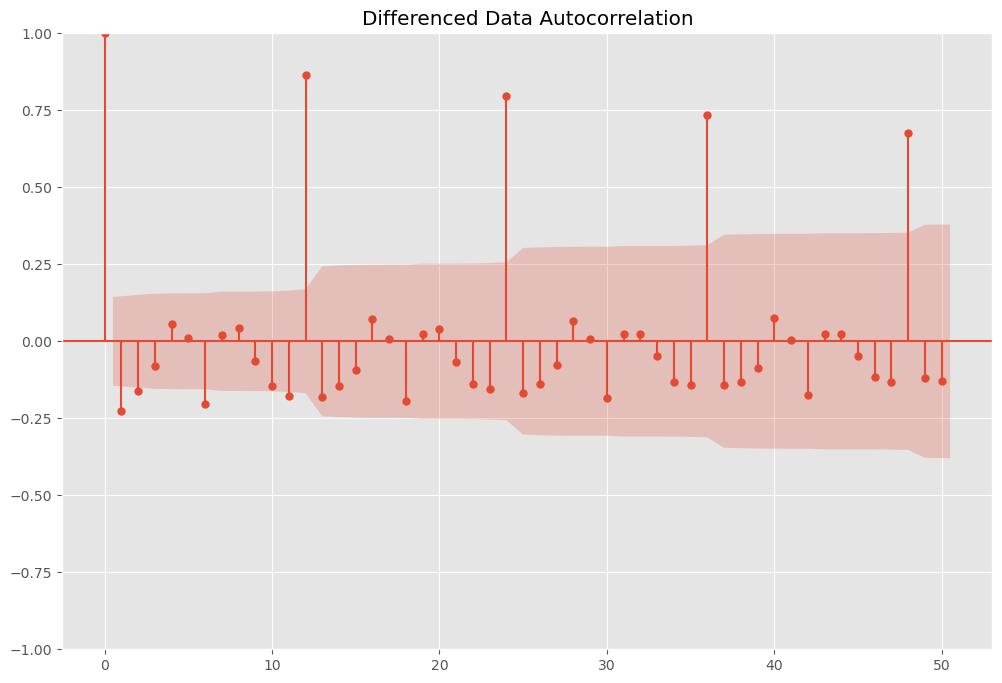

In [174]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation');

We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

## Auto SARIMA model - With Seasonality as 6

In [175]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))] # seasonal PDQ
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print(f'Model: {pdq[i]}{model_pdq[i]}')

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [176]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [177]:
from  statsmodels.tsa.statespace.sarimax import SARIMAX

In [178]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = SARIMAX(train['Sparkling'],order=param, 
                               seasonal_order = param_seasonal,
                               enforce_stationarity=False,
                               enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        
        print(f'SARIMA{param}x{param_seasonal} - AIC:{results_SARIMA.aic}')
        
        SARIMA_AIC = SARIMA_AIC.append({'param':param,
                                        'seasonal':param_seasonal, 
                                        'AIC': results_SARIMA.aic},
                                       ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.378076171631
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.635553689147
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.5599844430662
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360111093406
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.401298687227
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.199361751069
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.917780565476
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.1629078505816
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.565285908279
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339542575
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.5732428785677
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298144977
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.709327440053
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885103987048
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933253477
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.6414775358064
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:

C:\Users\suloc\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:1917.5889468369714
SARIMA(1, 1, 0)x(2, 0, 0, 6) - AIC:1813.2423977988924
SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:1814.8301602826402
SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:1791.3715283080983
SARIMA(1, 1, 1)x(0, 0, 0, 6) - AIC:2204.934049154585
SARIMA(1, 1, 1)x(0, 0, 1, 6) - AIC:2103.2471520742433
SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:1906.3976381403684
SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:2109.6671209726437
SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:2005.5946277140772
SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:1856.077523655493
SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:1776.9417670619257
SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:1778.8222557972065
SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:1743.3747274904058
SARIMA(1, 1, 2)x(0, 0, 0, 6) - AIC:2188.4633450503766
SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:2089.1320924465963
SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:1908.334791743282
SARIMA(1, 1, 2)x(1, 0, 0, 6) - AIC:2108.564551026967
SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:1987.1476985677784
SARIMA(1, 1, 2)x(1, 0, 2, 6) - A

In [179]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1727.670865
26  (0, 1, 2)  (2, 0, 2, 6)  1727.888820
80  (2, 1, 2)  (2, 0, 2, 6)  1729.192578
17  (0, 1, 1)  (2, 0, 2, 6)  1741.641478
44  (1, 1, 1)  (2, 0, 2, 6)  1743.374727

In [180]:
# Now build a SARIMA model using the pdq and PDQ values identified above
auto_SARIMA_6 =SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
results_auto_SARIMA_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.835
Date:                           Sun, 25 Dec 2022   AIC                           1727.671
Time:                                   18:59:12   BIC                           1749.700
Sample:                                        0   HQIC                          1736.613
                                           - 132                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6452      0.286     -2.256      0.024      -1.206      -0.085
ma.L1         -0.3355      0.227     -1.475      0.140      -0.781       0.110
ma.L2         -0.8805      0.277     -3.179      0.001      -1.423      -0.338
ar.S.L6       -0.0045      0.027     -0.165      0.869      -0.057       0.049
ar.S.L12       1.0361      0.018     56.097      0.000       1.000       1.072
ma.S.L6        0.0675      0.152      0.444      0.657      -0.231       0.366
ma.S.L12      -0.6125      0.093     -6.592      0.000      -0.795      -0.430
sigma2      1.153e+05   1.79e+04      6.456      0.000    8.03e+04     1.5e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                25.26
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.63   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

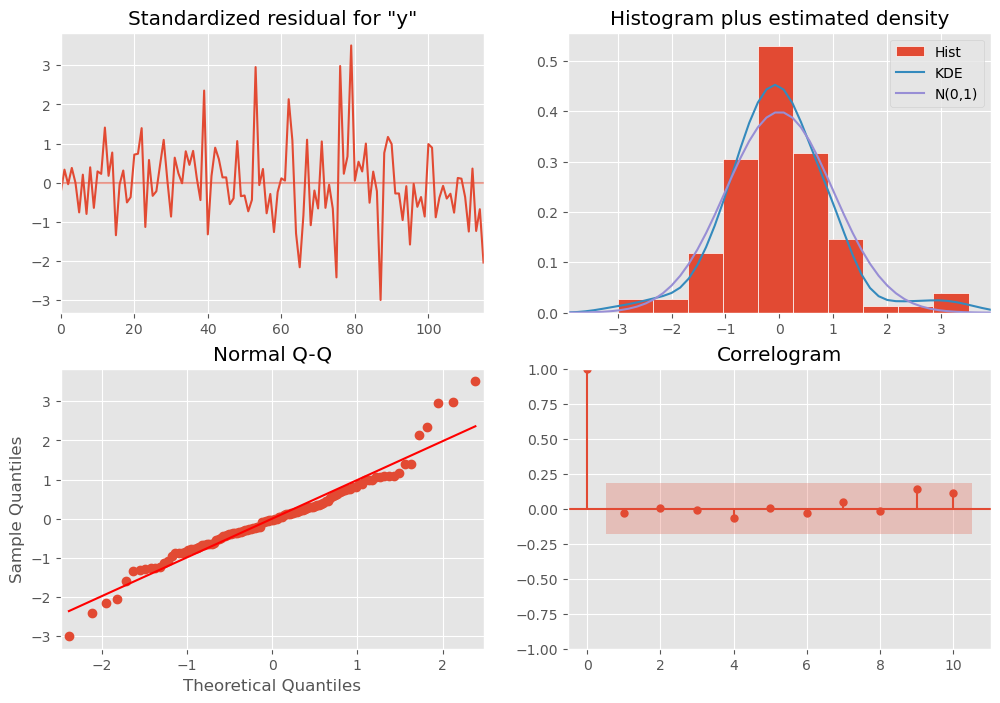

In [181]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

## Prediction on the Test Set & Evaluation

In [182]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))


In [183]:
predicted_auto_SARIMA_6

In [184]:
predicted_auto_SARIMA_6.predicted_mean

array([1330.38799817, 1177.30519635, 1625.89626452, 1546.39596399,
       1308.68153291, 1104.16066507, 1729.9955212 , 1667.09528558,
       2183.23513957, 3206.51972789, 4408.90532235, 6499.09737749,
       1276.77051457,  999.13170717, 1538.58392857, 1401.98165905,
       1182.35286085,  940.44073768, 1625.53456416, 1553.0009173 ,
       2090.9123804 , 3148.16432172, 4397.24448128, 6562.47748026,
       1149.53866176,  861.5815031 , 1418.50348896, 1271.98835359,
       1039.01738433,  778.591408  , 1512.66898786, 1438.75888184,
       1993.62817993, 3089.68020083, 4384.9018525 , 6629.45001924,
       1017.8432037 ,  719.81852333, 1294.36696725, 1137.6646551 ,
        890.49802047,  610.64243527, 1396.29060076, 1321.04383061,
       1893.37563521, 3029.69235677, 4372.77256469, 6699.59349219,
        881.91188909,  573.46545621, 1166.19653784,  998.76075628,
        736.67134181,  436.31776091, 1276.3184339 ])

In [185]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1330.387998  380.562480     584.499243    2076.276754
1  1177.305196  392.109807     408.784096    1945.826296
2  1625.896265  392.304326     856.993915    2394.798614
3  1546.395964  397.706871     766.904819    2325.887109
4  1308.681533  398.926076     526.800791    2090.562275

In [186]:
rmse_autosarima6 =rmse(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean)
print(rmse_autosarima6)

626.854441818761


In [187]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_autosarima6]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
RegressionOnTime                                     1275.867052
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha= 0.049,SimpleExponentialSmoothing              1316.052168
Alpha=0.3,SimpleExponentialSmoothing                 1935.000000
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha= 0.11,Beta=0.04,Gamma=0.36,TripleExponent...    402.923002
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    343.884469
ARIMA(2,1,2)                                         2249.492600
SARIMA(1,1,2)(2,0,2,6)                                626.854442

## Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [188]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print(f'Model: {pdq[i]}{model_pdq[i]}')

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [189]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [190]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model =SARIMAX(train['Sparkling'],
                                            order=param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        
        print(f'SARIMA{param}x{param_seasonal} - AIC:{results_SARIMA.aic}')
        
        SARIMA_AIC = SARIMA_AIC.append({'param':param,
                                        'seasonal':param_seasonal ,
                                        'AIC': results_SARIMA.aic},
                                       ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684396
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640235386
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389947
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.210873579141
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158605988
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.989805392077
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505816
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566367
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089573284939
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838782
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193755196
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319652595416
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954176502
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245084961544
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018825096564
SARIMA(0, 1, 

In [191]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584261
53  (1, 1, 2)  (2, 0, 2, 12)  1555.929654
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121564
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340402

In [192]:
auto_SARIMA_12 =SARIMAX(train['Sparkling'],
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)

results_auto_SARIMA_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -769.965
Date:                            Sun, 25 Dec 2022   AIC                           1555.930
Time:                                    19:01:55   BIC                           1577.085
Sample:                                01-31-1980   HQIC                          1564.500
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6383      0.287     -2.226      0.026      -1.200      -0.076
ma.L1         -0.0978      0.253     -0.387      0.698      -0.593       0.397
ma.L2         -0.7252      0.171     -4.232      0.000      -1.061      -0.389
ar.S.L12       0.7617      0.567      1.344      0.179      -0.349       1.873
ar.S.L24       0.2945      0.590      0.499      0.617      -0.861       1.450
ma.S.L12       1.8873      3.345      0.564      0.573      -4.670       8.444
ma.S.L24      -1.8054      2.480     -0.728      0.467      -6.665       3.055
sigma2      2.277e+04   6.05e+04      0.376      0.707   -9.58e+04    1.41e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                12.56
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                             0.35
Prob(H) (two-sided):                  0.20   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

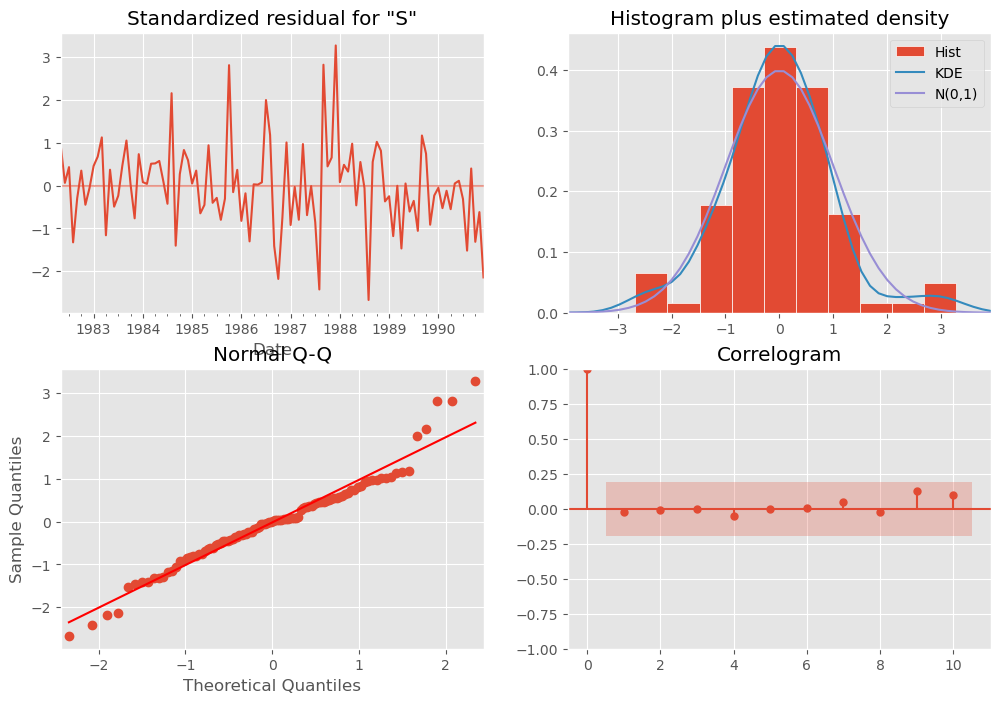

In [193]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

## Predict on the Test Set & Evaluation

In [194]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [195]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1317.921866  390.287377     552.972662    2082.871069
1991-02-28  1309.807680  403.644160     518.679663    2100.935697
1991-03-31  1608.864101  403.656185     817.712517    2400.015685
1991-04-30  1599.996685  409.157133     798.063440    2401.929930
1991-05-31  1378.371138  410.006607     574.772954    2181.969322

In [196]:
rmse_autosarima12 = rmse(test['Sparkling'],
                         predicted_auto_SARIMA_12.predicted_mean)
print(rmse_autosarima12)

546.383792177467


In [197]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_autosarima12]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
RegressionOnTime                                     1275.867052
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha= 0.049,SimpleExponentialSmoothing              1316.052168
Alpha=0.3,SimpleExponentialSmoothing                 1935.000000
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha= 0.11,Beta=0.04,Gamma=0.36,TripleExponent...    402.923002
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    343.884469
ARIMA(2,1,2)                                         2249.492600
SARIMA(1,1,2)(2,0,2,6)                                626.854442
SARIMA(1,1,2)(1,0,2,12)                               546.383792

#  Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

## Manual ARIMA model - Using ACF & PACF plots

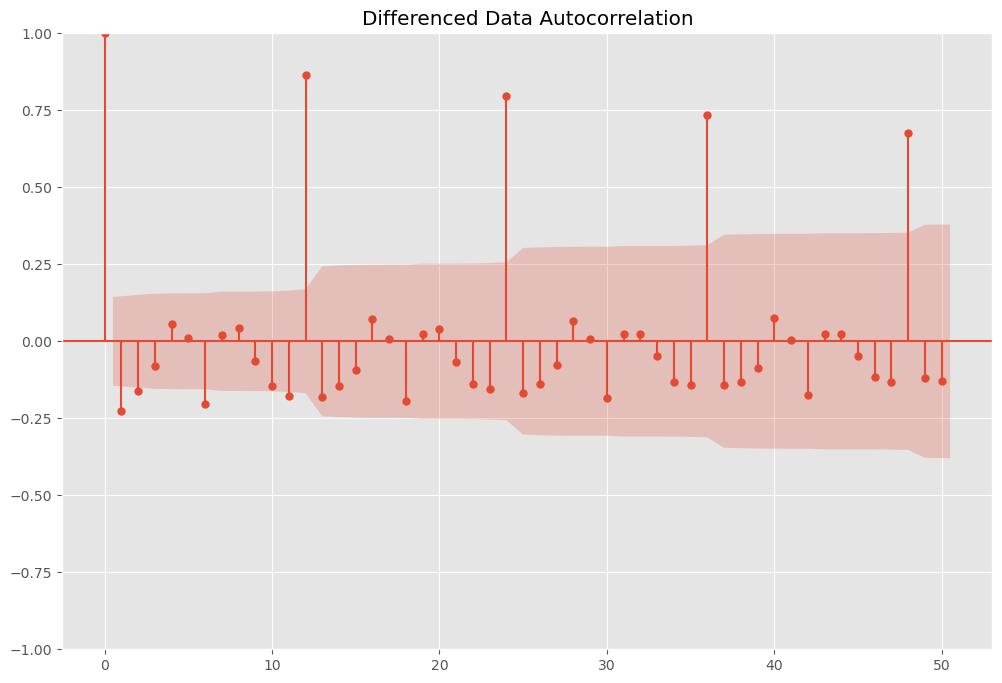

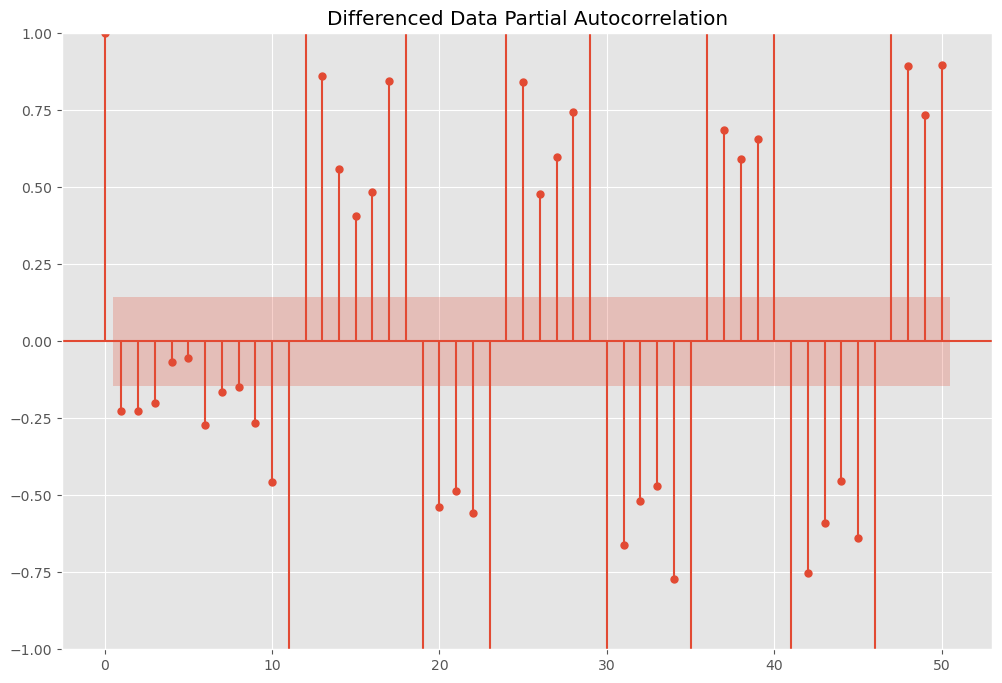

In [198]:
plot_acf(df['Sparkling'].diff().dropna(),
         lags=50,
         title='Differenced Data Autocorrelation');
plot_pacf(df['Sparkling'].diff().dropna(),
          lags=50,
          title='Differenced Data Partial Autocorrelation');

### Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.
By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 2 and 3. So,our pdq values are 3,1,2.



In [199]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(3,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1109.376
Date:                Sun, 25 Dec 2022   AIC                           2230.752
Time:                        19:01:59   BIC                           2248.004
Sample:                    01-31-1980   HQIC                          2237.762
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4336      0.044     -9.945      0.000      -0.519      -0.348
ar.L2          0.3284      0.112      2.931      0.003       0.109       0.548
ar.L3         -0.2380      0.068     -3.476      0.0

C:\Users\suloc\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Predict on the Test Set & Evaluation

In [200]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [201]:
from statsmodels.tools.eval_measures import rmse
RMSE_manualarima = rmse(test['Sparkling'],
                        predicted_manual_ARIMA)
RMSE_manualarima

1283.1274142895754

In [202]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [RMSE_manualarima]}
                           ,index=['manualARIMA(3,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
RegressionOnTime                                     1275.867052
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha= 0.049,SimpleExponentialSmoothing              1316.052168
Alpha=0.3,SimpleExponentialSmoothing                 1935.000000
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha= 0.11,Beta=0.04,Gamma=0.36,TripleExponent...    402.923002
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    343.884469
ARIMA(2,1,2)                                         2249.492600
SARIMA(1,1,2)(2,0,2,6)                                626.854442
SARIMA(1,1,2)(1,0,2,12)                               546.383792
manualARIMA(3,1,2)                                   1283.127414

## Manual SARIMA model Setting the seasonality as 6- Using ACF & PACF plots

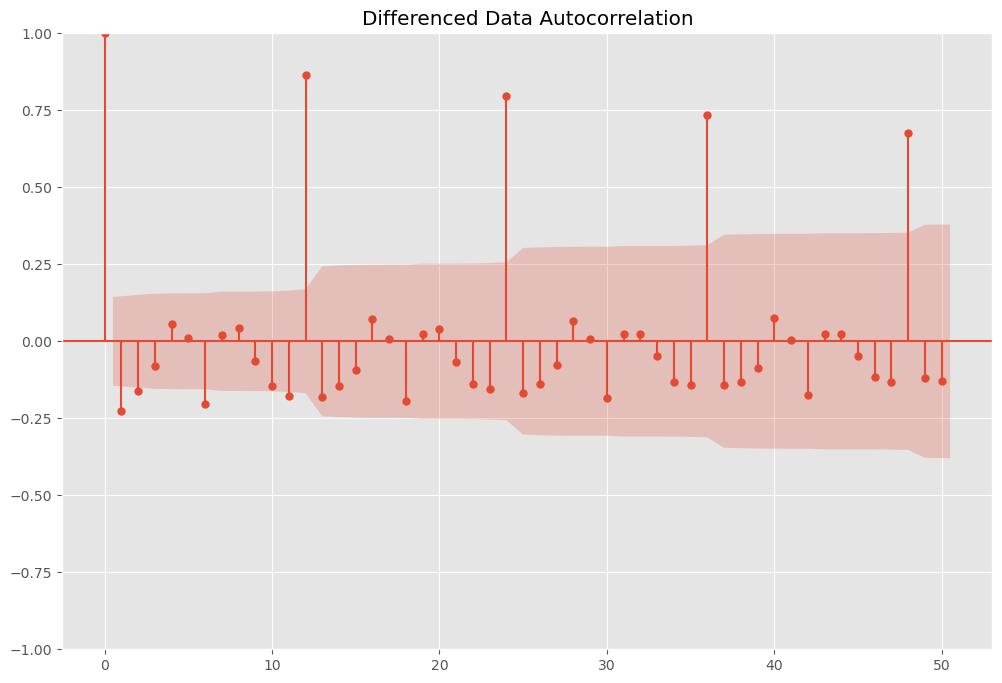

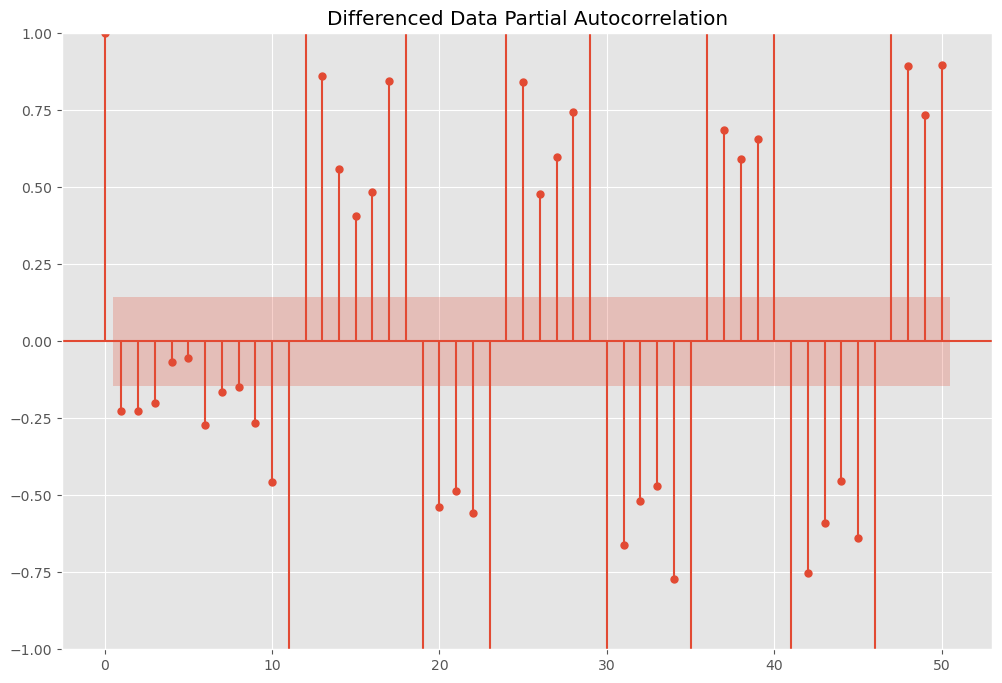

In [203]:
plot_acf(df['Sparkling'].diff().dropna(),
         lags=50,
         title='Differenced Data Autocorrelation');
plot_pacf(df['Sparkling'].diff().dropna(),
          lags=50,
          title='Differenced Data Partial Autocorrelation');

In [204]:
manual_SARIMA_6 =SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
results_manual_SARIMA_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.621
Date:                           Sun, 25 Dec 2022   AIC                           1731.242
Time:                                   19:02:04   BIC                           1758.778
Sample:                                        0   HQIC                          1742.420
                                           - 132                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6750      0.273     -2.472      0.013      -1.210      -0.140
ar.L2         -0.0309      0.168     -0.184      0.854      -0.360       0.298
ar.L3          0.0343      0.108      0.317      0.751      -0.178       0.247
ma.L1         -0.1095      0.262     -0.419      0.676      -0.622       0.403
ma.L2         -0.6849      0.230     -2.977      0.003      -1.136      -0.234
ar.S.L6       -0.0031      0.026     -0.121      0.904      -0.053       0.047
ar.S.L12       1.0383      0.018     58.309      0.000       1.003       1.073
ma.S.L6        0.0743      0.161      0.461      0.645      -0.242       0.390
ma.S.L12      -0.6352      0.096     -6.607      0.000      -0.824      -0.447
sigma2       1.44e+05    1.8e+04      7.995      0.000    1.09e+05    1.79e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                19.68
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.66   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predict on the Test Set & Evaluation

In [205]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [206]:
predicted_manual_SARIMA_6

In [207]:
predicted_manual_SARIMA_6.predicted_mean

array([1315.52154333, 1157.83518279, 1585.0015713 , 1553.88844332,
       1285.86202669, 1093.07826506, 1711.70144823, 1668.25581724,
       2151.99207922, 3185.77709307, 4409.90065187, 6508.21487638,
       1253.60360535,  963.55439975, 1510.67950227, 1396.4670129 ,
       1159.93547897,  928.57609811, 1599.70577496, 1549.33750429,
       2052.81966176, 3125.18456072, 4397.51204351, 6576.60160358,
       1118.8702823 ,  817.82347679, 1384.35689526, 1262.44594726,
       1012.92629327,  765.96683161, 1479.67495909, 1428.3096857 ,
       1949.3137617 , 3063.10879058, 4384.91631846, 6648.19125699,
        979.31541339,  666.90265501, 1253.51256954, 1123.48864151,
        860.32724978,  596.91130994, 1355.48068345, 1303.11556704,
       1842.2501815 , 2999.08650978, 4372.31051316, 6723.04458261,
        834.80225214,  510.59151471, 1117.99041419,  979.40975654,
        701.92531086,  421.15231041, 1226.97902268])

In [208]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1315.521543  379.530164     571.656090    2059.386997
1  1157.835183  388.240419     396.897945    1918.772421
2  1585.001571  388.398544     823.754413    2346.248729
3  1553.888443  396.762802     776.247641    2331.529246
4  1285.862027  397.601593     506.577224    2065.146829

In [209]:
rmse_manualsarima6 =rmse(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean)
print(rmse_manualsarima6)

648.59610108432


In [210]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_manualsarima6]}
                           ,index=['manualSARIMA(3,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
RegressionOnTime                                     1275.867052
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha= 0.049,SimpleExponentialSmoothing              1316.052168
Alpha=0.3,SimpleExponentialSmoothing                 1935.000000
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha= 0.11,Beta=0.04,Gamma=0.36,TripleExponent...    402.923002
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    343.884469
ARIMA(2,1,2)                                         2249.492600
SARIMA(1,1,2)(2,0,2,6)                                626.854442
SARIMA(1,1,2)(1,0,2,12)                               546.383792
manualARIMA(3,1,2)                                   1283.127414
manualSARIMA(3,1,2)(2,0,2,6)                          648.596101

## Manual SARIMA model Setting the seasonality as 12- Using ACF & PACF plots

In [211]:
manual_SARIMA_12 =SARIMAX(train['Sparkling'],
                                order=(3, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)

results_manual_SARIMA_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -769.903
Date:                            Sun, 25 Dec 2022   AIC                           1559.805
Time:                                    19:02:13   BIC                           1586.249
Sample:                                01-31-1980   HQIC                          1570.519
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6452      0.344     -1.874      0.061      -1.320       0.029
ar.L2         -0.0452      0.178     -0.254      0.800      -0.394       0.304
ar.L3          0.0216      0.139      0.155      0.877      -0.251       0.295
ma.L1         -0.3501      0.279     -1.254      0.210      -0.897       0.197
ma.L2         -0.8670      0.373     -2.324      0.020      -1.598      -0.136
ar.S.L12       0.7480      0.593      1.262      0.207      -0.413       1.909
ar.S.L24       0.3103      0.616      0.504      0.614      -0.896       1.517
ma.S.L12      -0.3144      0.581     -0.541      0.588      -1.453       0.824
ma.S.L24      -0.2752      0.370     -0.744      0.457      -1.000       0.450
sigma2      1.206e+05   2.56e+04      4.704      0.000    7.03e+04    1.71e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 9.71
Prob(Q):                              0.99   Prob(JB):                         0.01
Heteroskedasticity (H):               1.61   Skew:                             0.28
Prob(H) (two-sided):                  0.16   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predict on the Test Set & Evaluation

In [212]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [213]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1309.110634  389.870001     544.979473    2073.241795
1991-02-28  1301.849851  400.599132     516.689980    2087.009722
1991-03-31  1565.079470  400.599345     779.919181    2350.239759
1991-04-30  1581.145498  408.638123     780.229494    2382.061501
1991-05-31  1355.287907  409.427498     552.824757    2157.751058

In [214]:
rmse_manualsarima12 = rmse(test['Sparkling'],
                         predicted_manual_SARIMA_12.predicted_mean)
print(rmse_manualsarima12)

569.8610972484652


In [215]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_manualsarima12]}
                           ,index=['manualSARIMA(3,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
RegressionOnTime                                     1275.867052
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha= 0.049,SimpleExponentialSmoothing              1316.052168
Alpha=0.3,SimpleExponentialSmoothing                 1935.000000
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha= 0.11,Beta=0.04,Gamma=0.36,TripleExponent...    402.923002
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    343.884469
ARIMA(2,1,2)                                         2249.492600
SARIMA(1,1,2)(2,0,2,6)                                626.854442
SARIMA(1,1,2)(1,0,2,12)                               546.383792
manualARIMA(3,1,2)                                   1283.127414
manualSARIMA(3,1,2)(2,0,2,6)                          648.596101
manualSARIMA(3,1,2)(2,0,2,12)                         569.861097

#  Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [216]:
resultsDf

Test RMSE
RegressionOnTime                                     1275.867052
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha= 0.049,SimpleExponentialSmoothing              1316.052168
Alpha=0.3,SimpleExponentialSmoothing                 1935.000000
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha= 0.11,Beta=0.04,Gamma=0.36,TripleExponent...    402.923002
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    343.884469
ARIMA(2,1,2)                                         2249.492600
SARIMA(1,1,2)(2,0,2,6)                                626.854442
SARIMA(1,1,2)(1,0,2,12)                               546.383792
manualARIMA(3,1,2)                                   1283.127414
manualSARIMA(3,1,2)(2,0,2,6)                          648.596101
manualSARIMA(3,1,2)(2,0,2,12)                         569.861097

In [217]:
resultsDf.sort_values(by=['Test RMSE']).round(0)

Test RMSE
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...      344.0
Alpha= 0.11,Beta=0.04,Gamma=0.36,TripleExponent...      403.0
SARIMA(1,1,2)(1,0,2,12)                                 546.0
manualSARIMA(3,1,2)(2,0,2,12)                           570.0
SARIMA(1,1,2)(2,0,2,6)                                  627.0
manualSARIMA(3,1,2)(2,0,2,6)                            649.0
2pointTrailingMovingAverage                             813.0
4pointTrailingMovingAverage                            1157.0
SimpleAverageModel                                     1275.0
RegressionOnTime                                       1276.0
manualARIMA(3,1,2)                                     1283.0
6pointTrailingMovingAverage                            1284.0
Alpha= 0.049,SimpleExponentialSmoothing                1316.0
9pointTrailingMovingAverage                            1346.0
Alpha=0.3,SimpleExponentialSmoothing                   1935.0
ARIMA(2,1,2)                                           2249.0
NaiveModel                                             3864.0
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing         18259.0

#  Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

## Building the most optimum model on the Full Data.

We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters  𝛼  = 0.3,  𝛽  = 0.3 and  𝛾  = 0.3.

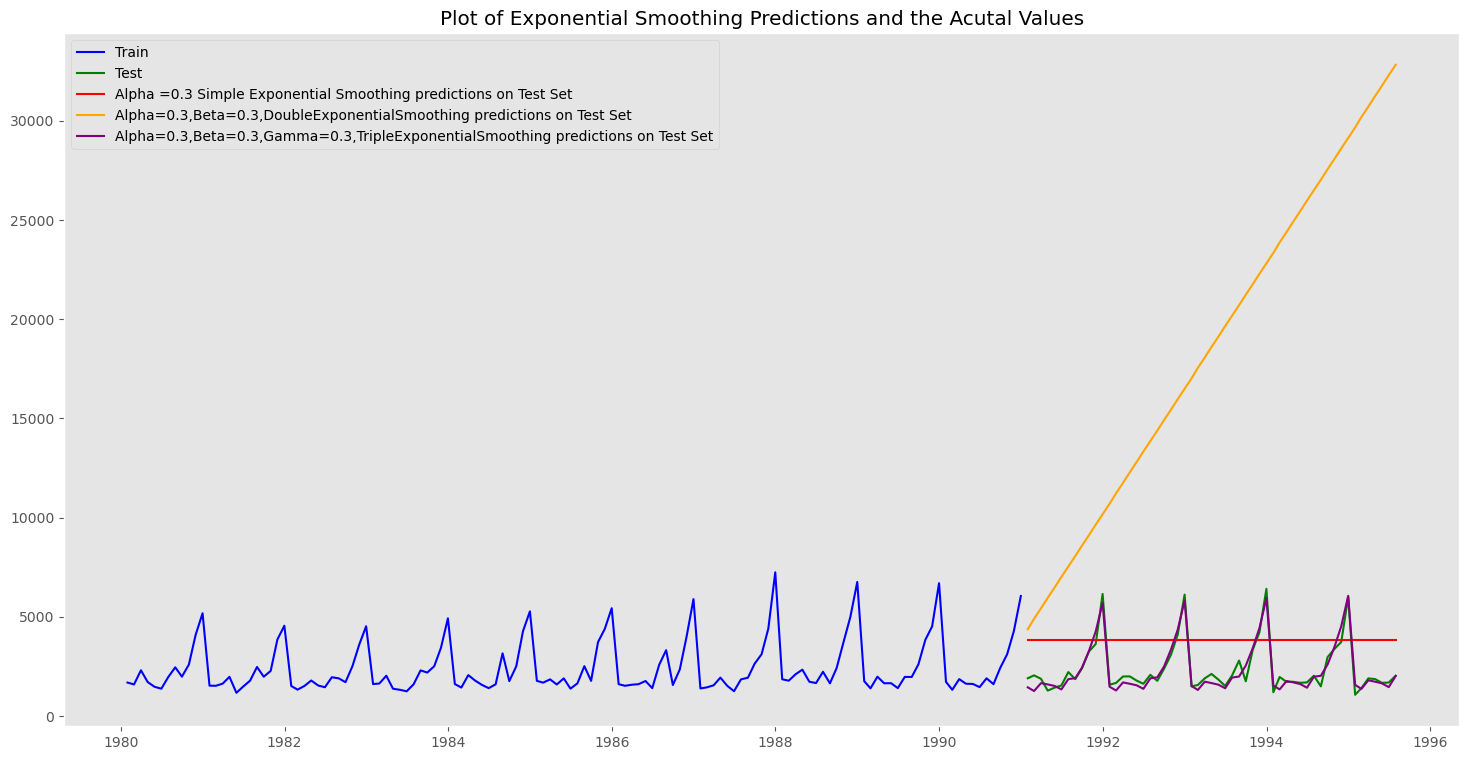

In [218]:
## Plotting on both the Training and Test data and comparing the 3 exponential models

# from turtle import color


plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train', color='blue')
plt.plot(test['Sparkling'], label='Test', color='green')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set', color='red')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set',color='orange')

plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set',color='purple')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [219]:
fullmodel1 = ExponentialSmoothing(df,trend='additive',seasonal='multiplicative')
fullmodel1= fullmodel1.fit(smoothing_level=0.3, smoothing_trend=0.3, smoothing_seasonal=0.3)

## Evaluate the model on the whole and predict 12 months into the future.

In [220]:
# Getting the predictions for 12 months 
prediction_1 = fullmodel1.forecast(steps=12)

In [221]:
RMSE_fullmodel1 = rmse(df['Sparkling'],
                       fullmodel1.fittedvalues)

RMSE_fullmodel1

421.39248511567126

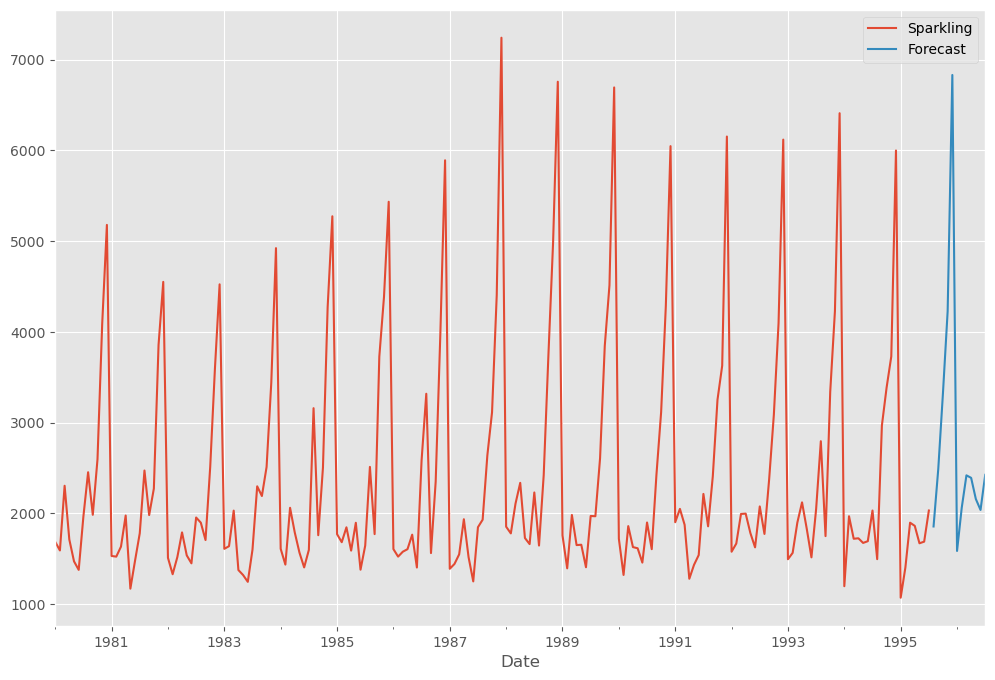

In [222]:
df.plot(legend  = True, label = 'Actual')
prediction_1.plot(legend = True, label = 'Forecast');

## Prediction Confidence Intervals : Margin of Error

In [223]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level.Here we are taking the multiplier to be 1.96 since in a normal distribution( as the residual should be if you have done the modelling properly,), 95% of values lie within +/- 1.96 sigma of the mean

pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*fullmodel1.resid.std(),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*fullmodel1.resid.std()}).round(0)
pred_1_df

lower_CI  prediction  upper_ci
1995-08-31    1027.0      1855.0    2684.0
1995-09-30    1659.0      2487.0    3315.0
1995-10-31    2496.0      3324.0    4152.0
1995-11-30    3399.0      4227.0    5055.0
1995-12-31    6003.0      6831.0    7659.0
1996-01-31     757.0      1585.0    2414.0
1996-02-29    1234.0      2062.0    2890.0
1996-03-31    1591.0      2419.0    3247.0
1996-04-30    1563.0      2391.0    3219.0
1996-05-31    1330.0      2158.0    2986.0
1996-06-30    1209.0      2037.0    2866.0
1996-07-31    1596.0      2424.0    3252.0

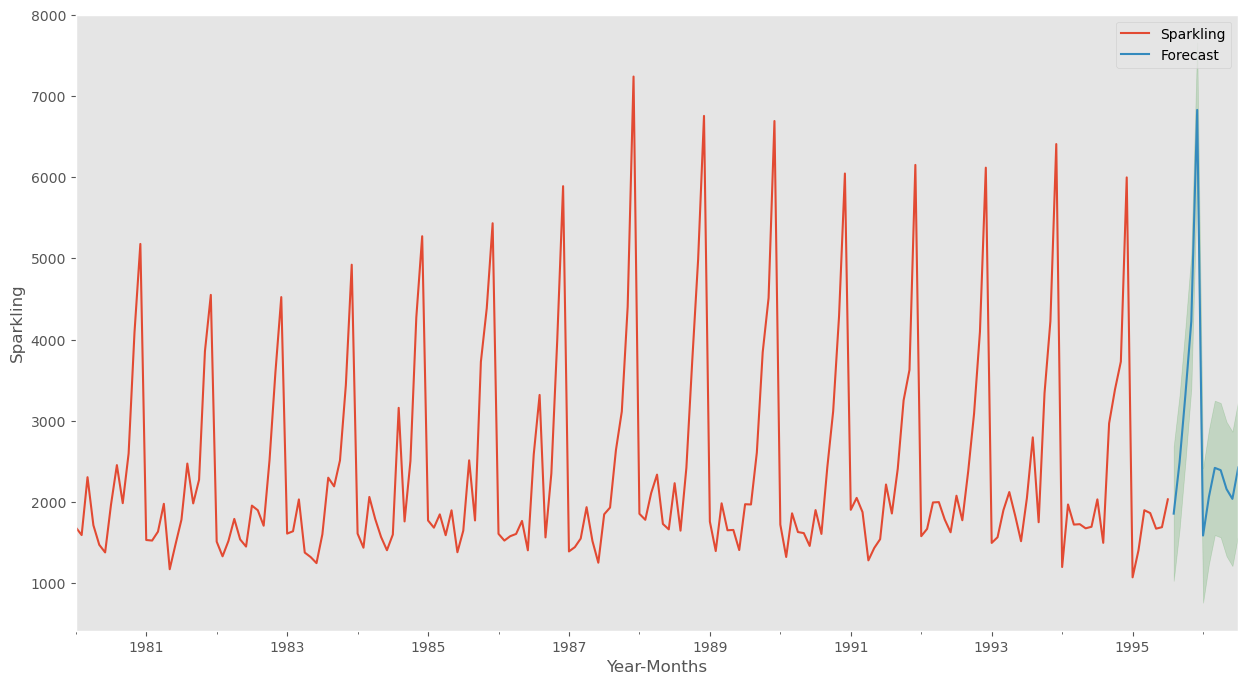

In [224]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8)) 

pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=1) 


axis.fill_between(pred_1_df.index, 
                  pred_1_df['lower_CI'], 
                  pred_1_df['upper_ci'], 
                  color='green', 
                  alpha=.15) 

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();

# END